In [1]:
# Existence of period doubling renormalisation fixed points

In [2]:
# Andrew D Burbanks$^1$, Andrew H Osbaldestin$^2$, Judi Thurlby.
# School of Mathematics and Physics, University of Portsmouth, UK.
#
# $^1$ corresponding author: andrew.burbanks@port.ac.uk
#
# $^1$ ORCID 0000-0003-0685-6670, $^2$ ORCID 0000-0002-2482-0738.
#
# Keywords: Dynamical systems; Renormalisation group;
# Universality; Period-doubling; Bifurcations;
# Computer-assisted proofs.
#
# January 2020.

In [3]:
# 2020-02-24
# Compute the polynomial and function ball bases once only.
# Store the DT(B1)(Ek) so that they can be re-used.
# Possible further optimisation is to store F1, F2 ready for noise.

# 2020-02-22
# V_noise initial guess needed to speed newton.

# 2020-02-21
# Converted eigensystems to use GenericSchur.
# This ensures that we gain full precision.

# 2020-02-20
# Low degree spectral bounds are good for high degree.
# We could suppress the spectral calculation at high degree.

# 2020-02-18
# Changed evaluations/compositions to horner method.
# Try a Russian Peasant version, with each power computed once?

# Abstract

We prove the existence of a fixed point to the renormalisation operator for period doubling in maps of degree $4$ at the critical point.  Our proof uses rigorous computer-assisted means to show that a quasi-Newton operator for the fixed-point problem is a contraction map on a suitable ball in a space of analytic functions.

We bound the spectrum of the derivative of the operator at the fixed point, establishing the hyperbolic structure, in which the presence of a single essential expanding eigenvalue explains the universal asymptotically self-similar bifurcation structure observed in the iterations of families of maps with degree $4$ at the critical point.

By recasting the eigenproblem for the derivative in nonlinear form, we use the contraction mapping principle to gain rigorous bounds on eigenfunctions and their corresponding eigenvalues.  In particular, we gain tight bounds on the eigenfunction corresponding to the essential expanding eigenvalue delta.

We bound the eigenfunction and eigenvalue that govern the scaling of additive noise.

By using a recursive scheme based on the fixed-point equation, we gain rigorous bounds on the domain of analyticity of the renormalisation fixed point.

Our computations use multi-precision arithmetic with rigorous directed rounding modes to bound tightly the coefficients of the relevant power series, including their high-order terms, and the corresponding universal constants.

# Introduction

An explanation for the remarkable universality observed in period-doubling cascades for families of maps of the interval with quadratic critical point was offered by Feigenbaum \cite{feigenbaum1978quantitative}, \cite{feigenbaum1979universal}, \cite{feigenbaum1979metric} and Coullet and Tresser \cite{tresserc1978iterations} in terms of a renormalisation operator acting on a suitable space of maps.

Lanford \cite{lanford1982computer} established the existence of a nontrivial hyperbolic fixed point of the operator by rigorous computer-assisted means.  

Eckmann et al \cite{eckmann1982existence} for area-preserving maps...
Eckmann and Wittwer \cite{ew1985computer} for maps of even degree $d$ at the critical point in the case $d\to\infty$...
Mestel \cite{mestel1985computer} for circle maps...
Stirnemann for complex maps...

Campanino et al \cite{campanino1982feigenbaum}...
Epstein \cite{epstein1986new}...
Eckmann and Wittwer \cite{eckmann1987complete}...
McMullen 1994...
Cvitanovic 1989 for a review...
Lyubich \cite{lyubich1999feigenbaum}...
MacKay \cite{mackay1993renormalisation}...

## The renormalisation fixed point

### The renormalisation operator

We consider the operator $R$ defined by
$$
Rg(x) = a^{-1}g(g(ax)),\quad\mbox{where $a=a_g=g(1)$.}
$$

### The fixed point

We seek a nontrivial fixed point of $R$ with a critical point of degree $d$ at the origin, for even $d$, in a Banach space $\mathscr{A}(\Omega)$ of functions analytic on the open disc $\Omega=D(c,r)\triangleq\{z\in\mathbb{C}:\ |z-c|<r\}$ and continuous on its closure, $\overline{\Omega}$, with (finite) $\ell_1$-norm.  Specifically, we let $X = Q(x) = x^d$ and write
$$
g(x) = G(Q(x)) = G(X). 
$$
We then seek a fixed point of the corresponding operator $T$ defined by
$$
TG(X) = a^{-1}G(Q(G(Q(a)X))),\quad\mbox{where $a=G(1)$.}
$$

In what follows, we focus on the case $d=4$.

In [3]:
const FloatType = BigFloat

const d = 4
const N = 480
const P = 480

const c = FloatType("0.5754")
const r = FloatType("0.8")

# choose a binary precision matching P as closely as we can.
setprecision(BigFloat, max(53, Int(floor(P*log2(10)))))

1594

In [4]:
using Plots
using LaTeXStrings
gr(xtickfontsize=12, ytickfontsize=12)
gr(guidefontsize=12, legendfontsize=12)
figstd=(500, 300);
figsquare=(500, 500);

### The disc algebra

We write $G\in\mathscr{A}(\Omega)$ as
$$
G = G^{u}\circ\psi,
$$
where $\psi:\overline{\Omega}\to\overline{\mathbb{D}}=\overline{D(0,1)}$ is given by
$$
\psi:x\mapsto\frac{x-c}{r},
$$
and take $G^{u}\in \mathscr{A}(\mathbb{D})$, the disc algebra: the set of functions analytic on the open unit disc $\mathbb{D}$ and continuous on its closure, $\overline{\mathbb{D}}$, with (finite) $\ell^1$-norm.  Equipped with the $\ell^1$ norm, $\mathscr{A}(\mathbb{D})$ (and, hence, $\mathscr{A}(\Omega$)) is a Banach space (in fact, a commutative unital Banach algebra) isometrically isomorphic to the sequence space $\ell^1$.

Note that functions $f\in \mathscr{A}(\Omega)$ may be written as power series expansions
$$
f(x) = \sum_{k=0}^{\infty} a_k\left(\frac{x-c}{r}\right)^k,
$$
convergent on $\Omega$.

## Nonrigorous calculation

### Finding approximate fixed points

Firstly, we compute approximate fixed points by working in the space of truncated power series of some fixed degree $N$ expanded on the disc $\Omega$.  We write $\ell_1$ as a direct sum of the corresponding polynomial part and the high-order part:
$$
\ell_1\cong\mathbb{R}^{N+1}\oplus\ell_1.
$$
Correspondingly, we write $f\in\mathscr{A}(\Omega)$ as
$$
f = f_P + f_H,
$$
in which $f_H$ represents the high-order terms.  We let $P\mathscr{A}(\Omega)$, $H\mathscr{A}(\Omega)=(I-P)\mathscr{A}(\Omega)$ denote the projections onto the polynomial part and high-order part of the space, respectively.

We compute an approximate fixed point of $T$ as a polynomial $f_P\in P\mathscr{A}(\Omega)$,
$$
f_P(x) = \sum_{k=0}^{N} a_k\left(\frac{x-c}{r}\right)^k.
$$

In [5]:
import Base: <, <=, ==, >, >=
import Base: zero, one
import Base: abs
import Base: +, -, *, /, ^

struct Poly
    coeffs::Array{FloatType, 1}
    cr::Tuple{FloatType, FloatType}
    Poly(a::Array{FloatType, 1}, cr) = length(a) == 1+N ? new(a, cr) : error("wrong #coeffs")
end

abs(t::Poly) = sum(abs(a) for a in t.coeffs)
zero(p::Poly) = Poly(fill(FloatType(0), N+1), p.cr)
one(p::Poly) = Poly([k==0 ? FloatType(1) : FloatType(0) for k in 0:N], p.cr)

(-)(p::Poly) = Poly(-p.coeffs, p.cr)

(*)(p::Poly, a::Number) = Poly(p.coeffs*a, p.cr)
(*)(a::Number, p::Poly) = p*a

(/)(p::Poly, a::FloatType) = p*(1/a)

function +(p::Poly, a::FloatType)
    coeffs = copy(p.coeffs)
    coeffs[1] += a
    Poly(coeffs, p.cr)
end

(+)(a::FloatType, p::Poly) = p+a
(-)(p::Poly, a::FloatType) = p+(-a)

(+)(p::Poly, q::Poly) = p.cr == q.cr ? Poly(p.coeffs+q.coeffs, p.cr) : error("!")
(-)(p::Poly, q::Poly) = p.cr == q.cr ? Poly(p.coeffs-q.coeffs, p.cr) : error("!")

(*)(a::Array{FloatType, 1}, b::FloatType) = [ak*b for ak in a]
(*)(b::FloatType, a::Array{FloatType, 1}) = a*b

(/)(a::Array{FloatType, 1}, b::FloatType) = [ak/b for ak in a]

function *(p::Poly, q::Poly)
    if p.cr != q.cr error("!") end
    coeffs = fill(FloatType(0), N+1)
    for j in 0:N
        for k in 0:N
            if j+k <= N
                coeffs[1+j+k] += p.coeffs[1+j]*q.coeffs[1+k]
            end
        end
    end
    Poly(coeffs, p.cr)
end

basis_element(p::Poly, k::Integer) = Poly([j==k ? FloatType(1) : FloatType(0) for j in 0:N], p.cr)

function identity(p::Poly)
    c, r = p.cr
    coeffs = fill(FloatType(0), N+1)
    coeffs[1] = c
    coeffs[2] = r
    Poly(coeffs, p.cr)
end

function diff(p::Poly)
    c, r = p.cr
    Poly([k == N+1 ? FloatType(0) : k*p.coeffs[1+k] for k in 1:N+1], p.cr)/r
end

# Power
function russian(t, p::Integer)
    if p == 0
        return one(t)
    elseif p == 1
        return t
    end
    
    # ignore trailing zeros in binary expansion
    trailing = trailing_zeros(p) + 1
    p >>= trailing
    
    # repeatedly square
    while (trailing -= 1) > 0
        t *= t
    end
    
    # compute the rest
    u = t
    while p > 0
        trailing = trailing_zeros(p) + 1
        p >>= trailing
        while (trailing -= 1) >= 0
            t *= t
        end
        u *= t
    end
    u
end

(^)(t::Poly, p::Integer) = russian(t, p)

# Evaluation and composition of polynomial.
# Compact, but could be made more efficient?
#function (t::Poly)(x::Union{FloatType, Poly, Complex{FloatType}})
#    c, r = t.cr
#    u = (x-c)/r
#    sum(a*u^(k-1) for (k, a) in enumerate(t.coeffs))
#end

# Evaluation and composition of polynomial.
function (t::Poly)(x::Union{FloatType, Poly, Complex{FloatType}})
    c, r = t.cr
    u = (x-c)/r
    #sum(a*u^(k-1) for (k, a) in enumerate(t.coeffs))
    total = t.coeffs[N+1]*u + t.coeffs[N]
    for k in N-1:-1:1
        total = total*u + t.coeffs[k]
    end
    total
end

(t::Poly)(x::Number) = t(FloatType(x))

### Initial guess at approximate fixed point

As a starting point, we consider the one-parameter family of maps given by
$$
f(x) = 1-\mu x^d.
$$
We choose a parameter value $\mu$ close to the accumulation $\mu_\infty$ of the first period-doubling cascade for the family.  (The intention is to find a function that lies close to the stable manifold of the renormalisation fixed point.)  In the case $d=4$, we have
$\mu_\infty\simeq 1.594901356228820564497828\ldots$.  Applying the renormalisation operator a number of times provides an initial approximate fixed point.

In [6]:
coeffs = fill(FloatType(0), N+1)
mu_infty = FloatType("-1.5949013562288205644978287")
coeffs[1:2] = [FloatType(1), mu_infty]
p0 = Poly(coeffs, (FloatType(0), FloatType(1)))

zero_Omega = zero(Poly(fill(FloatType(0), N+1), (c, r)))
I_Omega = identity(zero_Omega)

g0 = p0(I_Omega)

Poly(BigFloat[0.08229375962593664718794936601999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999829, -1.27592108498305645159826296, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], (0.575400000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [7]:
poly_basis = [basis_element(g0, k) for k in 0:N];

## Renormalisation operator and Frechet derivative

### Newton operator and Frechet derivative

We note that fixed points of $T$ are zeros of the operator $FG = TG-G$, and perform Newton iterations, in the space of power series truncated to degree $N$, to approximate such a zero.  The one-step Newton operator is given by
\begin{align*}
\phi:G
&\mapsto G - [DF(G)]^{-1}F(G)\\
&= G - [(DT - I)(G)]^{-1}(T(G) - G),
\end{align*}
in which $DT(G)$ denotes the tangent map of $T$ at $G$, given by the Frechet derivative

\begin{align*}
DT(G):\delta G
\mapsto
&-a^{-2}\delta a G(Q(G(Q(a)X)))\\
&{}+ a^{-1}\biggl(
    \delta G(Q(G(Q(a)X)))\\
    &\quad{}+ G'(Q(G(Q(a)X)))\cdot Q'(G(Q(a)X))\cdot \bigl[
        \delta G(Q(a)X)\\
        &\qquad{}+ G'(Q(a)X)\cdot Q'(a)\delta a\cdot X
    \bigr]
\biggr),
\end{align*}

where $\delta a = \delta G(1)$.  After the Newton iterations converge to our chosen precision, we denote the resulting approximate fixed point by $G^0=G^0_P$.

Our goal is then to prove that the operator $T$ has a locally-unique fixed point in a ball $B^1$ of functions centered on $G^0$ in the space $\mathscr{A}(\Omega)$.  The operator $T$ is not itself contractive.  However, we can find a quasi-Newton operator $\Phi$ that has the same fixed points as $T$ and prove that $\Phi$ is a contraction mapping on $B^1$.  The contraction mapping principle then yields the desired result.

In [8]:
Q(z) = z^d
Qdash(z) = d == 2 ? 2*z : d*z^(d-1)

function T(f)
    x = identity(f)
    a = f(1)
    (1/a)*f(Q(f(x*Q(a))))
end

function T(g)
    x = identity(g)
    
    a = g(1)
    Qa = Q(a)
    xQa = x*Qa
    gxQa = g(xQa)
    QgxQa = Q(gxQa)
    gQgxQa = g(QgxQa)
    Tg = (1/a)*gQgxQa
end

function T_and_DT(g)
    x = identity(g)
    
    a = g(1)
    Qa = Q(a)
    xQa = x*Qa
    gxQa = g(xQa)
    QgxQa = Q(gxQa)
    gQgxQa = g(QgxQa)
    Tg = (1/a)*gQgxQa
    
    g_dash = diff(g)
    g_dashxQa = g_dash(xQa)
    g_dashQgxQa = g_dash(QgxQa)
    
    dgxQadm1 = d*gxQa^(d-1)
    
    # we should ensure that any subexpressions
    # that do not depend on delta_g
    # are computed in the outer function, here.
    
    function DTg(delta_g)
        delta_a = delta_g(1)
        delta_Qa = d*a^(d-1)*delta_a
        delta_xQa = x*delta_Qa
        delta_gxQa = delta_g(xQa) + g_dashxQa*delta_xQa
        delta_QgxQa = dgxQadm1*delta_gxQa
        delta_gQgxQa = delta_g(QgxQa) + g_dashQgxQa*delta_QgxQa
        delta_Tg = (-1/a^2)*delta_a*gQgxQa + (1/a)*delta_gQgxQa
    end
    
    Tg, DTg
end

T_and_DT (generic function with 1 method)

In [9]:
function eye(T::Type, n::Integer)
    I::Array{T, 2} = [j==k ? T(1) : T(0) for k in 1:n, j in 1:n]
end

# matrix elements is parallelised in the newer, 640, code.
function matrix_elements(L, basis)
    J_polys = map(L, basis)
    J = [J_polys[k].coeffs[j] for j in 1:N+1, k in 1:N+1]
end

function newtonstep(p::Poly)
    Tp, DTp = T_and_DT(p)
    Fp = Tp - p
    J = matrix_elements(DTp, poly_basis)
    I = eye(FloatType, N+1)
    q = Poly(p.coeffs - inv(J-I)*Fp.coeffs, p.cr)
end

function newton(p0::Poly, n::Integer)
    prev_error = FloatType(10)^10
    for k in 1:n
        p1 = newtonstep(p0)
        error = abs(T(p1)-p1)
        if error < prev_error
            println("$k: $error")
            p0 = p1
            prev_error = error
        else
            break
        end
    end
    p0
end

newton (generic function with 1 method)

In [10]:
ga = g0
gb = T(ga)
erra = abs(gb-ga)
for k in 1:20
    gc = T(gb)
    errb = abs(gc - gb)
    println("$(k) $(errb)")
    if errb < erra
        gb, ga = gc, gb
        erra = errb
    else
        break
    end
end

1 0.3006015216642470446521984467679237380294331712224122617124365340724579269807903375400942267126472896404757427907226256708478848465675727339376916724072188499989012904129525444868580525621087455567005341573956970409324664434241394115562717781016474787961858208739446850552127166240491675947610742969263604047233966977111869677603769242310460729185535362163066649163286314866882871078688290380508090689802675660474696872005557976280043396437504018898644037409149319742627017547157128
2 0.02346509242791335839763410389828405392921700389752231107669751601939221704775807066353953185988945456557759931222379703533384139259077949334787696037489095006284277864626999070731806643884309813530848135570313302356038748495155316914515540516870611649668845375365517749282444085381453447006561796099389982998271347203738963637189221842923097946134163334406319764819623953587273052276481612066563379991784389731849869316026800467820016433095550972427474664500043587947404238899198922
3 0.01804265742848504939541

18 3.136116105555169378159827188743189706875705549349704190423442692525289347074201145923277561586928003537328182364454802596365855273307081477466176421694895116353724321745300094538022424279376537544348076969403256818891540673214850686418055708116067122840789588123755062795690553996849708014479122080853267141845088605336171993161152356876338780212535106829042216098038525697921961566482614202165018463557371354158252502363082600761146243229158210120847737674453895688581381002630564e-09


In [11]:
abs(T(ga)-ga)

5.625850989371967464511188368882404701607762628327613950554598714163346608384819096794454106601151922907423502537550398760274172203139833537340022130332401029752687342146751936694248679797981104609801798338853099832339481358909497996411706932326653899010176813449013008717455991897656332640509641518979701128595189260502437267627800276737845788943965147374325895909885728568008432446038183311018796900348153696474978573440070944594136946293718332110597277249642853645666031032070435e-10

In [12]:
#precompile
newton(g0, 0);

In [15]:
ga.coeffs[1]

-0.0001511713514460155301289642588768352853017301750241487020518659884569104827171155264597345256339502391146240124829582695938474048018926866879759842653767977938095259404150646178589998361731249752176892302778383166083254023236357581637716944749211396446646692929510631909251195632425690053766902604252824980766218371400838773323567493267570105509667801302178838237035505137678032809161338957278768961074221771018402048725215242656956463028195218325033006568549363432203271756974108185

In [16]:
@time gn = newton(ga, 20);

1: 7.203578803580628163451869878961838321258491534392525143086072990094090627305089150698306494287345255097740235826438756261316429445657956538669542548594841805100410215977410776352574558713159790606779067214309461812091110882545322776239654403845555264849504311030479689706437236457950753844013865158029058954454140120348928502760402857827653158042678501190312705657530763419009943507452672632813087061569462873747809248732339192586465941931284581617611500554419942781753661338638418e-20
2: 2.941660694186793843972152208480775852616399307790543879865467929736136240119866728507136016783422193913710605494080565557347841576199987094708606899638759182963313548876893826643740342695337101913634528054612592791290128501857580963768035944936881916300775678267852336817263045871549542871460573744228154320729797509085364720147710522726274918693057161863326210063747734435282844010906639327339039850386891742876477494612239169405920330120112695192714588755347618075717293934897645e-39
3: 2.965065986915072

In [17]:
gn(0)

0.9999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999993371598434329203573111787422542541540453615577292977001938641329677265922407523905899609365290238826116984413745924167231199267055921731429208809359222444256190628

In [18]:
gn(1)

-0.5916099166344381501396243543816289537902229891907558296390562608082701611002444465530968731159671843103521418006432697438637238931206828820779931596162409259411543052964276134709882939926870491577958887408376170145437404809085217681192114170711171042533082421009703580642260084834328708016478467785643980486155413890436492164645121108179164082412065610139569320911294764772312617597152067500630718989468609785136913217657293053863461669689416361275456189246955741579331444665678863

In [19]:
1/gn(1)

-1.690302971405244853343780150324161348228278059709561966682423263449739219088810551432766085786152919151931526308212594164105077561630908572940573192526278310204244018956025177655047935226236876644541321907107192676834935546971945672766866785148451453189013911194135568528212080475469696047558987391859329506662359225987639193065208967975130581985215916713340826311552832535603683044993101976409614821352769481192994471439859165983622001275758159038459937058615355819740339040916246

In [20]:
residue_approx = T(gn)-gn
abs(residue_approx)

1.404261126355596985457446686135899026356636829806967986735410287325876189172395986434231365358042299692217293829883132679551021871226852151681048104721274331854220444270703768790054853055975000717732537943324487971884981864931068670262880501544977380493679341087405308744354733671688710613580068701256152387189496246717447402741161717352122554589268470819981945057037524270057394716649001941922261152545003251501225884782899749794826755240034122236025302140444960378639345399236279e-479

In [21]:
ccc = gn.coeffs[1]

-0.0001511713350611291656840261159270919019237755709709817217414582918066104345259248288363569970343909936843052943870955651632007280456366801254175497134495694233204691022525525744921618127627868298306851128851750975628167740775703832655309932158811600523716590542438715231641835980685838847029840272029067002619921466762995716894749729845673437074840411354183275369302639495549917040846348438374204448591512104176151575095569520637713938254498790481918521467125822328947283541794235361

In [22]:
a = gn(1)
x = identity(gn)
xQa = x*Q(a)
psi(x) = (x-c)/r
norm1 = abs(psi(xQa))

0.7536423257237438864255931458452542313274839711478746703332428640580848482497972725610048619323420253628792246007404827541089029012226972704583855669734669365726443602365696824029560931963961815910622010125762551311722137227455570251344010755147125663155557116733018679516889677672574589801110471838232095959996509191271219874740402094692918117424003663376544507923433654735384390414899254672819064021176450318994572819602855128655565841385564804943538196657551155248885818913493245

In [23]:
QgxQa = Q(gn(xQa))
norm2 = abs(psi(QgxQa))

0.8034565068330793155746543122975066294353301987227608356292291707428176461485712142964345813680271194378271726019217026638596972383202399704472912561569990529424970690635105298344429025605102641948856423735041996324511653912126981904841508130792450028540581258475687621876840220373609799440396537371598978522691751344228179924803878035339475376209721332504627626662969270449246761451761680151991549123942785261805496686842406463334642584845945049710784143742537320794720879839180783

In [24]:
if norm1 >= 1 || norm2 >= 1
    println("Proof hopeless with these domains.")
end

In [25]:
Tgn, DTgn = T_and_DT(gn)
@time J = matrix_elements(DTgn, poly_basis);

13760.428089 seconds (214.34 G allocations: 26.516 TiB, 22.23% gc time)


In [26]:
using Serialization
open(f -> serialize(f, gn), "feig_pow$(d)_deg$(N)_c1_r2p5_g.jls", "w")
open(f -> serialize(f, J), "feig_pow$(d)_deg$(N)_c1_r2p5_jac.jls", "w")

In [27]:
using Serialization
#gn = open(deserialize, "feig_pow4_deg40_c1_r2p5_g.jls")

In [28]:
for (k, a) in enumerate(gn.coeffs)
    println("$(k-1): $(a)")
end

0: -0.0001511713350611291656840261159270919019237755709709817217414582918066104345259248288363569970343909936843052943870955651632007280456366801254175497134495694233204691022525525744921618127627868298306851128851750975628167740775703832655309932158811600523716590542438715231641835980685838847029840272029067002619921466762995716894749729845673437074840411354183275369302639495549917040846348438374204448591512104176151575095569520637713938254498790481918521467125822328947283541794235361
1: -1.256390384839309113454966121731993593499508120265622773318149464633484336396804836636204709387546957569886985680440958954578313380665096451307611970486949817228483926263071247157541387050294375085102861980199101154532151910107399882664265223606888402126394556941200474897489421196716170925849460102196207429018722231111905115031395865281037312643751885071258887522227449265242068514865890722216559474620999372431197869239311405481569154591033074527813927017296840708532990408677994
2: 0.24681564755947988

21: 4.223753560176127120262152941017498828980550135422166913414626494869252974703719761312054342987796517789953303870708379929998960259277832057902612461508059346567851419046463309228251066685443705696651920339276545104526073928906203175651361092143887275564644358135475496189723237730118250887512288777466760527716014345094355167223733134573438102083268371809826207542098515500896430174163070233329777019686853385914952377894497082726898121734961023364138485815239532664864611000687053e-11
22: -1.004640487249960190552248036195906371458459714233105251926275000968316851585889481309574328264152762775158640194160807632903370564838466479229465947268281174375195425842279748826772379742118402507624228230201801063629787139523966682298973420392768056017989776367281181924087445811737531904148481041497480225748992238948845304449797355810091490229005583132464685915359439180133307901854880764164130355367512329882661642719738181074093498642961319862373009062384429166341547882162648e-12
23: -3.5586766176

42: -3.107258353303393209675099434768988298590364389765467038594631636834112663182796890381739362024992104301412563110932684434118291607303597628366606937938943557041377561843053458305228317153171063502918046243041468910728023585808486461000470083529070045821347589473424356433923766993650503292688630628935979076232698990456287808107344759224727236920510772041733387810978680172187331148538240581132459473858796536024400250449925952940384626075416999619290234552790507159454972493414327e-22
43: 1.649089492940070427716708426167823653536300558250611781769753630385016221486928868164871541928520624589431541065703028440223816183430738781256904580956213033005001013440229312825453414819165959498640552322263005251049194664665884291299762757293395344543961205421313141918766028075526891330617746927506713797134177947178193262288098772101145550265186305230810587193899915412279040841342184143901866653143164955409595695630684582758323500628643215583191716683327241664921591050433278e-22
44: -1.3826024906

63: -5.295523463315953856767355785461027600818844752979490197158264548022569616274009067597195790589458592340767328431718014937766223938682179162079566022944836395067395092796883696267710005959583542131176356114865039610932558296236048464148054917988964251074341555014817676474627930019993001558961639814330997435406755806998076692959847420754603939701469083057613709787729794517007343657179557087961327080085638488576142825740984960044362723548784723956244085010266706504681761913942397e-33
64: -7.352010366697961839141978107193865155201510859463453415152096579536656303823231244117129590678915517728220677689200543866078293899899937846356497786878062085002839134928971590065681697874440837513016077949199092139804127650458769876245815676726343580927288839533467594025413291429958488385072718724742032496439327863299560533873383721103764350150023525867700812729803634632714136408708288730746096953591256681387326848317481935426421942557846531520026258523965310670237048933539957e-34
65: 6.7754933117

84: 7.825302122891420449910609703674696660328484887834297803105780864222573746041260684673559201518359787632156371939176466879733494741896151145683707605782897125413286722806090171354083888321762508823717806788477679607615430135585493314871410461753155485685554713225084790299214871089225186009786086954202352816851267910445976393929666483001281395487456903665403211116338220012858369843011479297975647031537042703234253943705003588012276813943432026829726858182653507237265790931350527e-44
85: -2.558977735570619788214443891361279888965131646371190723644897108266004626823375499608882699448656374397141744954497800990462887105999446916053128156135655416285261419994796073287314370240521555524716230330265310978812513871189670539858027995495012618756570487892831902756308089064657757033187089631841342715628898621711454996476280322930620399169930434840140978971555840165268778946806206567432045182877171721295697604591805337415398694629094248849168013887103060877396706987001547e-44
86: -5.8892854317

105: 5.231657006703374038413827518987035370760234705210087631189217736661016003716829465535147970733674942655236159848835198748866575361932530003864897096415673534703489124967647396110923124476920430152040160048797529154379072440030553514792253541522989233533661669197650028649289726041702971271783294039866263248201930715400206767545561646587354926300226749987266343561461448523995580378989146043860294786352933301824564746164619900638498851066348551731290395837278699028269037342728182e-55
106: 2.507289455616075234021027797916506118401938353387676363868835144101349145646060708193220849932914166764244393134649478264051894568358269711226649458638900378361938514348929618683896053648496509243944181163537616264953897095968823459147499263060435428378281133294443893263907810019203371304593393542867223312680741020617168140589646407096585934508744966286527686343067140373425937847536195437658810260302349146681865397413662552823632192694781920058032951066797971871096048903932936e-55
107: -1.12840857

126: -1.663402431430239141633975170870095707533623349777473899658096951973355232584976240227222898962004618437510599344406738254680284793038679415964427799265993120379620975293299620050191092707335129207638888951039233913248249825478370936120668735991462402282297341855670757209911531144792215718642211097533229957626346942773585672548756301502132313674248014988602539375408321679782693129733177713666882107542820838839339134962020353842086113844809369809852270314779021896004967048106546e-65
127: 3.145366978977059591764303049211858511670909459969286591619945182696953273309007051924600816965766619995447504272043059856757565834361065754810340315806512041264359834629071817874093883233938833083408681398568747394096724463781303470064695230555333024374437118963184219118433289101564902436906037826451124995128324456467511358070202008633876185210999402878824128074855534326384046633370153669938729114921767022713778080764945608142810948764829754938638135054182184668952266189123287e-66
128: 7.22296511

147: -2.238703638330434485621003402065876851910397226505072967477558590141621745878655648140410547900969032957126948695986458304142333368562575901986587009679966592742065745823223890381652092212208059945832747969380297463453629643142443414302410175319328649689812099052011126710171578685914770725990176605174000029753524538522671041923741483074511309304977869981118572520130317629112676901584886639093416706537250613094533348065470975537758435570604969811145993097053158082258411686948357e-78
148: -6.336705036804937509402469205129486682980110869974228272345464410937928985062325720434795871565888804460084593527843929048842151314985986835071921138810962735594223520938200246930162686604659805821429006231502615369675001171397048367830998429010016537430475666620118581686807127334537433382025501959672573711594705795304299361792593782781022458100453997997683409638098791660487216750895289749742876682756262623235418011295342157562174994177583556348221619654105305509456661828455315e-77
149: 1.6583972

168: 3.116384421406464173116778063780678046499109400846852501881280884606097244942522973590825697244665620228359043234380612047340665460302139723880111296494416553026731550932304667590361106832939689844283702016374528567797052408991020609753086441308245242266114496852891057325106558377123162425825812680858286578826184105161975172972733472725376130279052721059302264339705081569840497367463438418425000845196549027819739192268858090225019042646440309670508666645055311600750695209112691e-87
169: -2.42925379437740653421938219170594112828863156915246100241651257790444192573920543841297306787284782182239492014298940134719271894052179940870692753326739513168054900322386814569386236871831463017124508335152373713511870220051194243675082122604668877473148751748225338898481130528240996244829646701041874293069104705767599043949199090075731081239587032062281255009824881699082285607602934097374173772993084296138735093758468664285449336450700955055195650549354627690506669693248565e-88
170: -2.24918404

189: -1.570958444357517017736933017084185164829644543668630616437360540340873834268592757051320456223553436562352390269498859798950591306129893535013106965407710110205772130720659409967942098902975719498153303929354052358312858641303676539312326950925718935169630809398946777358238990315098047190635557573420400705880229145659077518379185491415130701734946127860366245287248195158714809663761136469796116144390013671330567299818476517677402539612669452007178811404088509160832162767683073e-98
190: 1.315206815265158192097870814519661968596037756489800973436672338343197784081162465100424695765082843616777256161494807769023698819931035133102641975209652136092973383634537920932204746744051213432647487514316088034393722178784956524220327412058764246623226049397565111119804050519151162492396071027394088127044985196883817056835891154552861083664151013190850992965822974974603401268942565291878134430232609640059245041344592034726551242988009936036354992103252181280470717177929915e-98
191: -1.9546425

210: -5.036057209654789745526811840305433739168923943791126855220103011507603902452278032527631632415092130398351040735455852280826754102458434600713337281662400211016656392470008789969863059772422976552498552061758653391101595696016093167102949357489542156291796085553404627777793897740186331886235695563484968075328891490882781491799025728985721103466838878823694792077490458781976705955719879005854907122892819111837383836121051213536727942190443396882184706090187250735705188448789762e-109
211: -2.009408546225274910394705873652082503044899243086797230515438193570155437853618848265730317820568409203481163206672610712805700589805111843792818020431234760910551614517799043223474807684180308217360375433962158435399835586786555048467095024164133929450955810296181104024831124124049656054414205687182492194847680671563134661235911925582866307252601466805665130013432875622472098897404443112226324008301907238384153680577661461216771179696244044511915887898967623524993398476709898e-110
212: 5.16739

231: 5.384375435401995692860861797572502887789178409179269460318017888251449236339648490568273177314599690114141956011507459809262003725426368944307015770630335161706267907579708644031596961138583623269266109790906799842247079291880435021461394475684641286310150117690656558783760118816857221071915768476580870632338927349557559065019887012389582505353177048786867481225401342993415372991251200262136548339091796221670901271680034659105828854524835647872695716809650248594529806947559001e-120
232: -2.335066877769727969310922536651100290398765159187600438153823216833199122831558525406857843557767709665540967483862479686344591167774493822890730076793152181145146721301041603563749448512795040397387134110007227906033174590165195082855590389085350564611229518674025348271807783627772262234776374460963373709308269246114176890176612289798166581594437981253078163488208758626768528516021495330057210908210005769769310482591070164808221958036229649575738343598989576384179655768487811e-120
233: 1.075224

252: 6.599047231920269074121371169757825311922559039336473807457490191514372875433419481683450774090882990906039318198515788186393712523586319673608311969503180734145463267657105835616471922250061106395052009197450343114692247079655704339827637817853233184270326739473932151155119560111800102600799592375906169373560288479946531545899057282253590322122839013110117701025925544830858504869611370447234757840446079164583041294769605867787578242400658795630903888847911372081129925396434991e-131
253: 1.52648000686105483556602774798541906354181997854442502574058330917802636893090123600251686849707577417249474758562792039834175753653783632679864082833852472237387026970701586219790726805820271819357065523844562323007110861409498725878732805943554320189461542781082905322117095574015198577397705994893059372933593363936251994198441733024535516240073662655998576527912353960757499675515894865565830722005521782952104400979708031642631488575028224966528460269411227601663816095846061e-131
254: -1.0035832

273: -1.320333938411756293730708939667871111606757466494164508692214509547048370917319404011247016453337409520894345654832006459370237363753824814225863546742598466902404615933201443173548722211017379672738352432621856507773404765596543879796043269179395004047397473531678149074264768311964914092029058477178224526314799250888663853661633194124466760787794154667189499099077779531125344520937947154419259904496532752358458894245871605749694931701615195269295604968801452129366663582205182e-141
274: 3.516195379885244732620879299521682211944215726485049438129164872933597975435559802631837913196738809615705807957133377914094644145193881654706195907920915959162312504897552504196397607519808013310380260075991263750298059448752579370339394107072727404098672028196962748205855860028287097057380313641261403113730248247474101512483377725819745684530066994432107446252633348632786188578057436947450147920153264471618959178863621686547545910414940682608011547474932816251617243296213808e-142
275: 3.087410

294: -5.353459271805949436302101453012343945324488618042255570091864276091397449869961615993013835865662223956425197483956067577614502385739605770461968721495997602231029456534175003220519644397343380914361123193459776993196460431578907187325899207288231181342299697467298402660668354123622190696826139510129720159543343784433658593457503669903403254069678881528222718969733494427276615946463412660266412563511573358483034932920631088361227401859932769563432575109729821803718285003434902e-153
295: -4.60706874282680672123002749116790332751422683518347481132317947031657010644642887501597987727196836716735699872521924145806224982851780593639982857694830181457807541972240218969907250317874870410719536276682988797878732858705620756596813173192857288078998882514866667362476959010515427687464141073859949248517464798286738318363899358170050297602852364085841717679665099484322818311782135670531039941119803598144648404558665550867421559106347681778881558329038514713041965640847162e-153
296: 1.685022

315: 2.709555813027335500046915447184009530593072034462185160062108531705767317489846177923988235755839204074034136964497044661448081406752518315124972796007587077035428711943384410331519442611624719714357238062550782083225588179104562579504697106233137538820769807694643056950251550215808275275063682004456403090193364445275454743765494595394848772082311659721265785396576804853468114306353746455480107671744899770671646540945038755435211657991958890494199841431529933292501283660682649e-163
316: -4.077026184526119083294345491711992019958950903728887507891447055887798518103580626314159667000436034075897217950528757885849945814711894511402705995142120716730402331632202136321542707628927340218446812286764799046725763462852094788819067529172050760546684798292147769927736236364309012981032540211504770295264616283626687444002817566265609772325003702450057013679736877225311115688093254255311963177267476126426994521099930982238483139285624991438953599892430580573353405566857599e-164
317: -1.44626

336: -4.364419258531692762196964977859340771519947173059235004874538699422051450246068688581813776397558766077552488707542326699079998347362007018064272811381344293140475516640149979215491101611220184092456123236321476863643571806679148717172975604685707149345473125056218129263485050444536768875797385764329518320190128829497594166619934143571808962489718759767718181064873998448358992820668618348647230503874749884785603535419494143440855779187444872973002785811580938528301625786587529e-175
337: 1.0656868609618346533666467134301526229919026397099992997967328827640861448213476173694191200456200777631963929215454170519042951158307484396424968446243958101076299500251459339546363331386217426654156423820645394811357876766944523794870918400013606949929613312954806977778397979188075928086871787923618612231338859035710989373678181346876543683229427436587230058418017173919348776448073578065280507800635920077693155473134426358267150143351292688098090463502260385533055614853988e-174
338: -2.3520171

357: -4.789710279376633708494300727713346688975925762962889155650540311215756346471611530248749676360107287946453213487728018602870617680241501928902820064131974064965170538489251508315468835223270766527154277874120569404222573251800857001841792150633232331274755094939315339563094527284579352224499511559697051491000665223053833649153085525319537177087459765495956938599649597858292719791690708208747645581998104889750400741989349928374073734115872330754028261497880760456222193175415893e-185
358: 1.904632571336461318271935998451472467567349356311546863719329226797261239412543533518761856133776934920794893330126708164574069863265860866716297254844981061403999390571488535725420103622017484773551770721657280551579895895744515979239187747552493911098751596452948626429649779241493763879943689765003898331075895721923624180132795027111209775143037100934003936513419500515905681987234616202135132636598950990733918459539636817928725007981238087083186025019623260101898903572828563e-186
359: 3.928614

378: 3.364496424999937151513483227091761360064981418184640933991460523426689831037979402188596977883751267283849283746685657321804648329822165876485703242360275641867188917132999227857927550059415970391386300823204095620579189830239364030239092493017128667879456676229377790281784827382644358190356342730731764163138491000030631246093076327212475200210571224856648858040813456889461690721219377688027976177352221797031014676222597891824845306887667151784382820657478023625550895741325559e-196
379: -2.082703887875377754846892294071685644293753649093674084383495998467625374009951775751756877165674836668409083121220556272515642060923554842498949315254667851571925130790708965356121026106534102950909900990604201405786927235574059454740703598478647534931780033427807022541855987579130434695697000597328327002680289556999226905491701977611846017200526469167346356786212016332528643785433021030450337847671108183010914330132333091586665381685161940111973093443734323040800358791721745e-196
380: 2.277996

399: 7.128913550683202302061347509863970798185522415687274994732582731914181719553241310504632319655451057704188711490382833022734401730818697085643446155106848572105332880374004456905303756559015381596585184387653974074473620053566110153690525243230479237741866310422411135363005626375045847693014872192227433763214956809634163979425948871555626265495828141715902698358593148612316959686655039848700543966099395565679876206757146275558484487620258449072305316910381158128946910142495895e-207
400: 7.593903801951782691584374717027720442676154961674872813968256306427272599354593610006917590238952634244550042100534439275722950260744226374169950941249064034174073696642439508056920348237956149172768321023642598911786179798134038453343639958350191000603485001906294268444231886002881313633884366366561431663343615548659002786603246480148918456361015905849838471919345512310161418392264997944895379428969843010310372919581004424286608879701288660945783422867327025446236437454451041e-208
401: -8.545001

420: -1.011277011346898080847592803453351453387921826731918199645554598228354595979637039455531106111036331915037751517054281820626327814925893202342198505847300801403449467662042302825033884300294283045479255112044956821015835430099926709966581108413987472021398661985439823091434655911646016440024927867706585396264478811336726184975741121564820953760144168878303877196686438458688769015792586363515606420195138653155877899353082077034587153982726913513140308974361006526043656278530471e-217
421: 3.487028143013671613198636674696242241260533863435506910713567221174197462225137046005799084587984314213397043057714101147016875127738583029653175468511927570385539790961393259117403827225827141460170419829527310663474532201830608018463232239516844313263764605376966853783574519344855912140172096529896398196355629666829885382001714210873954659176446541494952060630971687058555980503010790877141535461614072570645696034331911857439576737448369367738250305533272657815493702792008391e-218
422: 3.225924

441: -7.938604557310522358306552296362195564401893186563010716416467180006157909342652072613381237301187285920857836191479175251909334569775361760811074687972442810410359345013636882419655435896279719452600130311127505622646384951560658353826353361929456239180907702059837647627804237736725077659497187412400118395789773112701875956618175928443686009327493299033483041205854603310333825847081131948559062024193330945638464864310779618589802582166545923524170299834526763114870158887381013e-229
442: -3.294838848067354745122245489392658584659946850170793614528246560255400352346803032412683771461841112284821658412188768662094234056733705741547746428058454616966150363038163379915044507574231320695588392114170767469441372124769716609348964084971884793868674191467143892941368119892769425128841255970063753273748948331651943411667160841648332907209508641269877229624668476890895760509179221496541559097835601102564633266290405091692642792048494285048428436462219058149331840431519802e-229
443: 1.58505

462: 2.326317776541977229378139226994748750207384361974681795510227551569551952082929499532616147810658512296198114176077974822962557085521143285954040031013961562866589728691007399978040766732302183488781596650963403765703598267497022220679668522537153372326356566436166499947954888206972116238115646486596424195243245703478284576687631115418611298831510235025639220011938369735823638074113043059575801151075123448344849480801471397208586151197327924117005904655397472389007014236758803e-239
463: -4.788606492111265572881876088972768748540332236466775086162958745091796455470200226767451097056724065593862666547031797204577784944352630963300469879164303827699442208053202967268551249874780611259020877261087519795648123696033910949365083495085723011522992444854466447773182014084805337096064131051857308554242439123403010700018596994254246907412319074091181653054591216872594225533501814298601679199838558729596182628052399020308532021713919037364123548763915730833020716879763556e-240
464: -9.10233

In [29]:
function linspace(a::FloatType, b::FloatType, n::Int64)
    @assert n>=1
    ps = [FloatType(k)/FloatType(n-1) for k in 0:n-1]
    xs = [b*p + a*(1-p) for p in ps]
end

linspace(a::Number, b::Number, n::Int64) = linspace(FloatType(a), FloatType(b), n)

linspace (generic function with 2 methods)

In [30]:
function gn_full(x::FloatType)
    if abs(x-c) < r
        return gn(x)
    else
        a = gn(1)
        return gn_full(Q(gn_full(Q(a)*x)))/a
    end
end

gn_full (generic function with 1 method)

In [31]:
using Plots

In [ ]:
x_vals = linspace(FloatType(-50), FloatType(50), 1000)
y_vals = map(gn_full, x_vals)
p = plot(x_vals, y_vals, legend=false, color="darkblue")
plot!(size=figstd)
plot!(xlabel=L"X", ylabel=L"G^{*}(X)")
savefig("fig_pow$(d)_deg$(N)_Gn.pdf")
display(p)

In [32]:
a = gn(1)
alpha = 1/a

-1.690302971405244853343780150324161348228278059709561966682423263449739219088810551432766085786152919151931526308212594164105077561630908572940573192526278310204244018956025177655047935226236876644541321907107192676834935546971945672766866785148451453189013911194135568528212080475469696047558987391859329506662359225987639193065208967975130581985215916713340826311552832535603683044993101976409614821352769481192994471439859165983622001275758159038459937058615355819740339040916246

In [ ]:
for level in 1:2:9
    x_vals = linspace(-abs(alpha)^level, abs(alpha)^level, 1000)
    y_vals = map(x->gn_full(Q(x)), x_vals)
    p = plot(x_vals, y_vals, legend=false, color="darkblue")
    plot!(size=figstd)
    plot!(xlabel=L"x", ylabel=L"g^{*}(x)")
    savefig("fig_pow$(d)_deg$(N)_gn_$(level).pdf")
    display(p)
end

## Rigorous proof

### Rigorous computations in the function space

In order that the proof is rigorous, we work with interval arithmetic using high-precision computer-representable bounds with directed rounding modes, conforming to the relevant standards.

Operations in the function space $\mathscr{A}(\mathbb{D})$ (and hence $\mathscr{A}(\Omega)$) are bounded rigorously by maintaining careful control over the coefficients of truncated power series along with bounds on the high-order terms.  In particular, we may define a ball of functions, centered on a polynomial $f_P\in P\mathscr{A}(\mathbb{D})$, with high-order bound $v_H\ge 0$ and general bound $v_G\ge 0$, as follows
\begin{align*}
B(f_P; v_H, v_G)
\triangleq \bigl\{
&f\in \mathscr{A}(\mathbb{D}):\\
&\ f = f_P+f_H+f_G,\\
&\ f_H\in H\mathscr{A}(\mathbb{D}),\|f_H\|\le v_H,\\
&\ f_G\in \mathscr{A}(\mathbb{D}),\|f_G\|\le v_G
\bigr\},
\end{align*}
thus $v_H$ bounds the norm of the high-order part, and $v_G$ is the radius of a ball in the usual sense.

Following [EKW], we extend the definition slightly, to the case where the function $f_P$ is not known exactly, but has coefficients $a_k$ bounded by intervals.  Let $v_P = ([b_0,c_0],\ldots,[b_N,c_N])\in J^{N+1}$ be a vector of intervals (here, $J=\{[a,b]:\ a,b\in\mathbb{R},a\le b\}$ denotes the set of intervals).  Given the bounds $v=(v_P,v_H,v_G)$, we define the standard function ball $B(v)\subset\mathscr{A}(\mathbb{D})$ by
\begin{align*}
B(v_P, v_H, v_G) \triangleq
\bigl\{
&f\in\mathscr{A}(\mathbb{D}):\\
&\ f = f_P+f_H+f_G,\\
&\ f_P\in P\mathscr{A}(\mathbb{D}),\\
&\ f_P(x) = \sum_{k=0}^{N}a_kx^k,a_k\in[b_k,c_k],\\
&\ f_H\in H\mathscr{A}(\mathbb{D}),\|f_H\|\le v_H,\\
&\ f_G\in \mathscr{A}(\mathbb{D}),\|f_G\|\le v_G
\bigr\}.
\end{align*}
The resulting set of functions is convex and compact.  The definition extends in a natural way to function balls $B_\Omega(v_P,v_H,v_G)$ for a general disc $\Omega$ by writing each function as the composition $f=f^{u}\circ\psi$ where $f^{u}\in B(v_P,v_H,v_G)$.

We bound operations on the function space $\mathscr{A}(\Omega)$ by first choosing computer-representable numbers for the bounds in $v\triangleq(v_P,v_H,v_G)$.  For each binary operation $\oplus$, for example, we then design a version, $\oplus_b$, acting on bounds $v,w$ such that $\forall f\in{B}(v),g\in{B}(w)$,
$$
f \oplus g\in{B}(v)\oplus{B}(w)\subseteq{B}(v\oplus_b w).
$$
In computing the operation $v\oplus_bw$, on bounds, rigorous directed rounding modes and interval arithmetic are used in order to guarantee that the above inclusion holds.  In this way, all vector space operations, together with product, $f\cdot g$, composition of functions, $f\circ g$, and differentiation followed by composition, $f'\circ g$, may be bounded.

In [33]:
# interval datatype
struct Interval
    lo::FloatType
    hi::FloatType
    Interval(lo, hi) = lo > hi ? error("bad Interval") : new(lo, hi)
    Interval(a) = Interval(a, a)
    Interval(i::Interval) = new(i.lo, i.hi)
end

# membership
function in(a::Number, x::Interval)
    x.lo <= a <= x.hi
end

# subset
function in(x::Interval, y::Interval)
    y.lo <= x.lo && x.hi <= y.hi
end

(==)(x::Interval, y::Interval) = x.lo == y.lo && x.hi == y.hi

(<)(x::Interval, y::Interval) = x.hi < y.lo
(>)(x::Interval, y::Interval) = y<x

(<)(x::FloatType, y::Interval) = x < y.lo
(<)(x::Interval, y::FloatType) = x.hi < y

(>)(x::FloatType, y::Interval) = y<x
(>)(x::Interval, y::FloatType) = y<x

zero(i::Interval) = Interval(0)
one(i::Interval) = Interval(1)

function abs(x::Interval)
    if 0 in x
        return Interval(0, max(abs(x.lo), abs(x.hi)))
    else
        return Interval(min(abs(x.lo), abs(x.hi)), max(abs(x.lo), abs(x.hi)))
    end
end

import Base: setrounding

function +(x::Interval, y::Interval)
    setrounding(FloatType, RoundDown)
    lo::FloatType = x.lo+y.lo
    setrounding(FloatType, RoundUp)
    hi::FloatType = x.hi+y.hi
    setrounding(FloatType, RoundNearest)
    Interval(lo, hi)
end

(-)(x::Interval) = Interval(-x.hi, -x.lo)
(-)(x::Interval, y::Interval) = x+(-y)

function +(x::Interval, a::Number)
    setrounding(FloatType, RoundDown)
    lo::FloatType = x.lo+a
    setrounding(FloatType, RoundUp)
    hi::FloatType = x.hi+a
    setrounding(FloatType, RoundNearest)
    Interval(lo, hi)
end

(+)(a::Number, x::Interval) = x+a
(-)(x::Interval, a::Number) = x+(-a)
(-)(a::Number, x::Interval) = -x+a

function *(x::Interval, y::Interval)
    setrounding(FloatType, RoundDown)
    lo::FloatType = min(x.lo*y.lo, x.lo*y.hi, x.hi*y.lo, x.hi*y.hi)
    setrounding(FloatType, RoundUp)
    hi::FloatType = max(x.lo*y.lo, x.lo*y.hi, x.hi*y.lo, x.hi*y.hi)
    setrounding(FloatType, RoundNearest)
    Interval(lo, hi)
end

function *(x::Interval, a::Number)
    if a >= 0
        setrounding(FloatType, RoundDown)
        c::FloatType = x.lo*a
        setrounding(FloatType, RoundUp)
        d::FloatType = x.hi*a
        setrounding(FloatType, RoundNearest)
        Interval(c, d)
    else
        setrounding(FloatType, RoundDown)
        e::FloatType = x.hi*a
        setrounding(FloatType, RoundUp)
        f::FloatType = x.lo*a
        setrounding(FloatType, RoundNearest)
        Interval(e, f)
    end
end

(*)(a::Number, x::Interval) = x*a

function iRec(x::Interval)
    if 0 in x
        error("division by zero")
    else
        setrounding(FloatType, RoundDown)
        lo::FloatType = 1/x.hi
        setrounding(FloatType, RoundUp)
        hi::FloatType = 1/x.lo
        setrounding(FloatType, RoundNearest)
        Interval(lo, hi)
    end
end

(/)(x::Interval, y::Interval) = x*iRec(y)
(/)(x::Interval, a::Number) = x*(1/a)
(/)(a::Number, x::Interval) = a*iRec(x)

function ^(x::Interval, n::Integer)
    if n%2 == 1 || x.lo >= 0
        # odd power
        setrounding(FloatType, RoundDown)
        a::FloatType = x.lo^n
        setrounding(FloatType, RoundUp)
        b::FloatType = x.hi^n
        setrounding(FloatType, RoundNearest)
        return Interval(a, b)
    elseif x.hi < 0
        setrounding(FloatType, RoundDown)
        c::FloatType = x.hi^n
        setrounding(FloatType, RoundUp)
        d::FloatType = x.lo^n
        setrounding(FloatType, RoundNearest)
        return Interval(c, d)
    else
        setrounding(FloatType, RoundUp)
        e::FloatType = x.lo^n
        f::FloatType = x.hi^n
        setrounding(FloatType, RoundNearest)
        return Interval(0, max(e, f))
    end
end

function sqrt(x::Interval)
    half = FloatType(1)/FloatType(2)
    @assert half*FloatType(2) == FloatType(1)
    @assert x.lo >= FloatType(0)
    setrounding(FloatType, RoundDown)
    a = x.lo^half
    setrounding(FloatType, RoundUp)
    b = x.hi^half
    setrounding(FloatType, RoundNearest)
    Interval(a, b)
end

comparable(x::Interval, y::Interval) = x.hi <= y.lo || x.lo >= y.hi

setrounding(t::Type{Float64}, mode) = nothing
#setrounding(t::Type{Double64}, mode) = nothing

function bound_quasi_power_careful(k0, g_norm::Interval)
    @assert(g_norm.hi < Interval(1))
    @assert(g_norm.hi > Interval(0))
    # important to make the interval trivial, here
    g_norm = Interval(g_norm.hi, g_norm.hi)
    k = k0 + 1
    latest = k * g_norm ^ (k - 1)
    greatest_upper = latest.hi
    greatest_lower = latest.lo
    #println(latest)
    
    # a new upper bound strictly below a previous lower bound
    # indicates that we have passed the maximum.
    # at that point, the greatest upper bound found so far
    # and the greatest lower bound found so far
    # together bound the maximum of the graph.
    
    while latest.hi >= greatest_lower
        if latest.lo > greatest_lower
            greatest_lower = latest.lo
        end
        if latest.hi > greatest_upper
            greatest_upper = latest.hi
        end
        k = k + 1
        latest = k * g_norm ^ (k - 1)
        #println(latest)
    end
    Interval(greatest_lower, greatest_upper)
end

# here, we would make the argument that
# the rounded version of the quasi power
# is not order reversing at any point.

# this means that it should be sufficient to
# compute upper bounds only.

function bound_quasi_power(k0, g_norm::Interval)
    @assert(g_norm.hi < Interval(1))
    @assert(g_norm.hi > Interval(0))
    # important to make the interval trivial, here
    k = k0 + 1
    setrounding(FloatType, RoundUp)
    latest = k * g_norm.hi ^ (k - 1)
    greatest_upper = latest
    while latest >= greatest_upper
        if latest > greatest_upper
            greatest_upper = latest
        end
        k = k + 1
        latest = k * g_norm.hi ^ (k - 1)
    end
    setrounding(FloatType, RoundNearest)
    Interval(0, greatest_upper)
end

# we established that the two methods produce the same results
#for k in 1:100
#    p = Int(floor(rand()*500))
#    x = 1-0.001*rand()
#    bound1 = bound_quasi_power(p, Interval(x)).hi
#    bound2 = bound_quasi_power_crude(p, Interval(x)).hi
#    if bound1 != bound2
#        println("$x: $bound1 != $bound2")
#    end
#end

function balanced(i::Interval)
    a = max(abs(i.lo), abs(i.hi))
    Interval(-a, a)
end

function nonnegative(i::Interval)
    a = max(i.lo, FloatType(0))
    @assert i.hi>=0
    Interval(a, i.hi)
end

function hull(v::Array{Interval, 1})
    lo = min([i.lo for i in v]...)
    hi = max([i.hi for i in v]...)
    Interval(lo, hi)
end

unit_vector(t::Type, k::Integer) = [j == k ? t(1) : t(0) for j in 0:N]

unit_vector (generic function with 1 method)

In [34]:
struct Rectangle
    re::Interval
    im::Interval
    Rectangle(re::Interval, im::Interval) = new(re, im)
    Rectangle(re, im) = new(Interval(re), Interval(im))
    Rectangle(re) = new(Interval(re), Interval(0))
end

in(x::Rectangle, z::Rectangle) = x.re in z.re && x.im in z.im
zero(z::Rectangle) = Rectangle(0, 0)
one(z::Rectangle) = Rectangle(1, 0)

(-)(z::Rectangle) = Rectangle(-z.re, -z.im)

(+)(z::Rectangle, w::Rectangle) = Rectangle(z.re+w.re, z.im+w.im)
(-)(z::Rectangle, w::Rectangle) = Rectangle(z.re-w.re, z.im-w.im)

(*)(z::Rectangle, x::Interval) = Rectangle(z.re*x, z.im*x)
(/)(z::Rectangle, x::Interval) = z*(1/x)

function reciprocal(z::Rectangle)
    d = z.re^2 + z.im^2
    Rectangle(z.re/d, -z.im/d)
end

(/)(z::Rectangle, w::Rectangle) = z*reciprocal(w)

(*)(z::Rectangle, w::Rectangle) = Rectangle(z.re*w.re-z.im*w.im, z.re*w.im+z.im*w.re)

(+)(z::Rectangle, x::Interval) = Rectangle(z.re+x, z.im)
(-)(z::Rectangle, x::Interval) = Rectangle(z.re-x, z.im)

# derived
(*)(x::Interval, z::Rectangle) = z*x
(/)(x::Interval, z::Rectangle) = Rectangle(x)/z
(+)(x::Interval, z::Rectangle) = z+x
(-)(x::Interval, z::Rectangle) = -z+x

# we don't have sqrt of an interval yet.
abs(z::Rectangle) = sqrt(z.re^2 + z.im^2)

(^)(z::Rectangle, p::Integer) = russian(z, p)

Rectangle(z::Complex{FloatType}) = Rectangle(z.re, z.im)

Rectangle

In [35]:
struct Trunc
    coeffs::Array{Interval, 1}
    Trunc(a::Array{Interval, 1}) = length(a) == 1+N ? new(a) : error("wrong #coeffs")
end

abs(t::Trunc) = sum(abs(a) for a in t.coeffs)

(^)(t::Trunc, p::Integer) = russian(t, p)

zero(t::Trunc) = Trunc([Interval(0) for k in 0:N])
one(t::Trunc) = Trunc([k == 0 ? Interval(1) : Interval(0) for k in 0:N])

# Vector space essentials
(+)(t::Trunc, u::Trunc) = Trunc(t.coeffs + u.coeffs)
(-)(t::Trunc) = Trunc(-t.coeffs)
(*)(t::Trunc, a::Union{Number, Interval}) = Trunc(t.coeffs * a)

# Vector space derived
(-)(t::Trunc, u::Trunc) = t+(-u)
(/)(t::Trunc, a::Interval) = t*(1/a)
(*)(a::Union{Number, Interval}, t::Trunc) = t*a

# I think that (*)(Array{T, 1}, Number) is defined already by default.
# But since Interval is not a subtype of Number,
# we must define (*)(Array{Interval, 1}, Interval).
(*)(a::Array{Interval, 1}, b::Interval) = [ak*b for ak in a]
(*)(b::Interval, a::Array{Interval, 1}) = a*b

# Convenience
function +(t::Trunc, a::Interval)
    coeffs = copy(t.coeffs)
    coeffs[1] += a
    Trunc(coeffs)
end

function -(t::Trunc, a::Interval)
    coeffs = copy(t.coeffs)
    coeffs[1] -= a
    Trunc(coeffs)
end

(+)(a::Interval, t::Trunc) = t+a
(-)(a::Interval, t::Trunc) = (-t)+a

# Algebra
function *(t::Trunc, u::Trunc)
    coeffs = fill(Interval(0), N+1)
    for j in 0:N
        for k in 0:N-j
            coeffs[1+j+k] += t.coeffs[1+j]*u.coeffs[1+k]
        end
    end
    Trunc(coeffs)
end

# Evaluation and composition of polynomial. Compact, but could be made more efficient?
#(t::Trunc)(x::Union{Interval, Rectangle, Trunc}) = sum(a*x^(k-1) for (k, a) in enumerate(t.coeffs))
function (t::Trunc)(x::Union{Interval, Rectangle, Trunc})
    total = t.coeffs[N+1]*x + t.coeffs[N]
    for k in N-1:-1:1
        total = total*x + t.coeffs[k]
    end
    total
end

function bound_high_order_product(t::Trunc, u::Trunc)
    coeffs = Dict{Int64, Interval}()
    for j in 0:N
        for k in 0:N
            if j+k > N
                a::Interval = t.coeffs[1+j]*u.coeffs[1+k]
                if haskey(coeffs, j+k)
                    coeffs[j+k] += a
                else
                    coeffs[j+k] = a
                end
            end
        end
    end
    sum(abs(a) for (k, a) in coeffs)
end

abs_star(t::Trunc) = sum(abs(t.coeffs[1+k]) for k in 1:N)

diff(t::Trunc) = Trunc([k == N ? Interval(0) : (1+k)*t.coeffs[2+k] for k in 0:N])

diff (generic function with 2 methods)

In [36]:
struct StdBall
    P::Trunc
    H::Interval
    G::Interval
    
    # we enforce the intervals h, g to be of the form [0, b].
    StdBall(p::Trunc, h::Number, g::Number) = new(p, Interval(0, h), Interval(0, g))
    StdBall(p::Trunc, h::Interval, g::Interval) = new(p, Interval(0, h.hi), Interval(0, g.hi))
end

zero(b::StdBall) = StdBall(zero(b.P), Interval(0), Interval(0))
one(b::StdBall) = StdBall(one(b.P), Interval(0), Interval(0))

# Abs
abs(b::StdBall) = nonnegative(abs(b.P) + b.H + balanced(b.G))

# Vector space operations

# Negative
(-)(b::StdBall) = StdBall(-b.P, b.H, b.G)

# Scalar multiples
(*)(b::StdBall, i::Interval) = StdBall(b.P*i, b.H*abs(i), b.G*abs(i))
(/)(b::StdBall, i::Interval) = b*(1/i)

# Add and subtract
(+)(b::StdBall, c::StdBall) = StdBall(b.P+c.P, b.H+c.H, b.G+c.G)
(-)(b::StdBall, c::StdBall) = b+(-c)

# Constant add and subtract
(+)(b::StdBall, i::Interval) = StdBall(b.P+i, b.H, b.G)
(-)(b::StdBall, i::Interval) = StdBall(b.P-i, b.H, b.G)

# Derived
(*)(i::Interval, b::StdBall) = b*i
(+)(i::Interval, b::StdBall) = b+i
(-)(i::Interval, b::StdBall) = (-b)+i

function *(b::StdBall, c::StdBall)
    PP_P = b.P*c.P
    PP_H = bound_high_order_product(b.P, c.P)
    PH = abs(b.P)*c.H
    PG = abs(b.P)*c.G

    HP = b.H*abs(c.P)
    HH = b.H*c.H
    HG = b.H*c.G
    
    GP = b.G*abs(c.P)
    GH = b.G*c.H
    GG = b.G*c.G
    
    P = PP_P
    H = PP_H + PH + HP + HH + GH + HG
    G = PG + GP + GG
    
    StdBall(P, H, G)
end

(^)(t::StdBall, p::Integer) = russian(t, p)

function abs_star(g::StdBall)
    x = abs_star(g.P) + Interval(0, g.G.hi) + Interval(-g.G.hi, g.G.hi)
    Interval(max(0, x.lo), x.hi)
end

# function ball compose

function (f::StdBall)(g::StdBall)
    if ~(f.H == f.G == Interval(0)) && ~(abs(g) in Interval(0, 1))
        error("composition not defined")
    end
    ball_1 = f.P(g)
    ball_3 = StdBall(zero(f.P), Interval(0), f.G)
    g_norm = abs(g)^(N+1)
    g_star_norm = abs_star(g)^(N+1)
    ball_2 = StdBall(zero(f.P), f.H*g_star_norm, f.H*(g_norm - g_star_norm))
    ball_1 + ball_2 + ball_3
end

function (f::StdBall)(g) #could be g::AbstractRigorousScalar
    if ~(f.H == f.G == Interval(0)) && ~(abs(g) in Interval(0, 1))
        error("composition not defined")
    end
    g_norm = abs(g)^(N + 1)
    r = f.H * g_norm + f.G
    f.P(g) + Interval(-r.hi, r.hi)
end

# could absorb this into earlier definition
#(t::Trunc)(x::StdBall) = sum(a*x^(k-1) for (k, a) in enumerate(t.coeffs))
function (t::Trunc)(x::StdBall)
    total = t.coeffs[N+1]*x + t.coeffs[N]
    for k in N-1:-1:1
        total = total*x + t.coeffs[k]
    end
    total
end

function diff_compose(f::StdBall, g::StdBall)
    if (f.H.hi > 0 || f.G.hi > 0) && ~(abs(g) in Interval(0, 1))
        error("diff composition not defined")
    end
    ball_1 = diff(f.P)(g)
    g_norm = abs(g)
    if f.G == f.H == Interval(0)
        norm_sup_H = norm_sup_G = 0
    else
        norm_sup_H = bound_quasi_power(N, g_norm)
        norm_sup_G = bound_quasi_power(0, g_norm)
    end
    # some sacrifice is made here! absorbing into general term!
    # an alternative is to absord into both high-order term and
    # the final polynomial coefficient.
    ball_2 = StdBall(zero(f.P), Interval(0), f.H * norm_sup_H)
    ball_3 = StdBall(zero(f.P), Interval(0), f.G * norm_sup_G)
    ball_1 + ball_2 + ball_3
end

diff_compose(f::StdBall, t::Trunc) = diff_compose(f, StdBall(t, 0, 0))

function basis_element(b::StdBall, k::Integer)
    if k <= N
        return StdBall(Trunc(unit_vector(Interval, k)), 0, 0)
    else
        return StdBall(Trunc(fill(Interval(0), N+1)), 1, 0)
    end
end

basis_element (generic function with 2 methods)

In [37]:
struct Domain
    c::Interval
    r::Interval
    Domain(c::Interval, r::Interval) = r.lo <= 0 ? error("domain radius") : new(c, r)
end

in(z::Union{FloatType, Interval}, d::Domain) = abs(z-d.c) < d.r
in(z::Rectangle, d::Domain) = abs(z-Rectangle(d.c, 0)) < d.r
(==)(d::Domain, e::Domain) = d.c==e.c && d.r==e.r

== (generic function with 206 methods)

In [38]:
struct Ball
    std::StdBall
    dom::Domain
end

# negative
(-)(f::Ball) = Ball(-f.std, f.dom)

# scalar multiply
(*)(f::Ball, i::Interval) = Ball(f.std*i, f.dom)
(*)(i::Interval, f::Ball) = f*i
(/)(f::Ball, i::Interval) = f*(1/i)

(*)(f::Ball, a::Number) = f*Interval(a)
(*)(a::Number, f::Ball) = f*a

# ball add
(+)(f::Ball, g::Ball) = f.dom == g.dom ? Ball(f.std+g.std, f.dom) : error("domain mismatch")
(-)(f::Ball, g::Ball) = f.dom == g.dom ? Ball(f.std-g.std, f.dom) : error("domain mismatch")

# scalar add
(+)(f::Ball, a::Interval) = Ball(f.std+a, f.dom)
(-)(f::Ball, a::Interval) = Ball(f.std-a, f.dom)

# ball mul
(*)(f::Ball, g::Ball) = f.dom == g.dom ? Ball(f.std*g.std, f.dom) : error("domain mismatich")

# ball pow
(^)(f::Ball, n::Integer) = Ball(f.std^n, f.dom)

# ball eval/compose
(f::Ball)(i) = f.std((i - f.dom.c)/f.dom.r)
(f::Ball)(g::Ball) = Ball(f.std((g.std - f.dom.c)/f.dom.r), g.dom)

# diff_compose
diff_compose(f::Ball, g::Ball) = Ball(diff_compose(f.std, (g.std - f.dom.c)/f.dom.r)/f.dom.r, g.dom)

# allow differentiation for composition
function diff(f::Ball)
    df(g::Ball) = diff_compose(f, g)
end

# identity with respect to domain
function identity(f::Ball)
    coeffs = fill(Interval(0), N+1)
    coeffs[1] = f.dom.c
    coeffs[2] = f.dom.r
    Ball(StdBall(Trunc(coeffs), Interval(0), Interval(0)), f.dom)
end

basis_element(f::Ball, k::Integer) = Ball(basis_element(f.std, k), f.dom)

function Ball(p::Poly, h::Number, g::Number)
    c, r = p.cr
    dom = Domain(Interval(c), Interval(r))
    t = Trunc(map(Interval, p.coeffs))
    s = StdBall(t, h, g)
    b = Ball(s, dom)
end

abs(b::Ball) = abs(b.std)

function (m::Array{Interval, 2})(b::Ball, coeff_HH::Interval)
    PP = m*b.std.P.coeffs
    # assume all of G is in the polynomial part
    PG = [hull(m[1+k,:])*balanced(b.std.G) for k in 0:N]
    P = Trunc(PP + PG)
    H = (b.std.H + b.std.G)*abs(coeff_HH)
    G = Interval(0)
    Ball(StdBall(P, H, G), b.dom)
end

In [39]:
dom = Domain(Interval(c), Interval(r))

Domain(Interval(0.5754000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000002, 0.5754000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000002), Interval(0.79

### Quasi-Newton operator

The Newton operator for the fixed-point problem was shown above.  However, its derivative would involve taking the second Frechet derivative which is inconvenient in practice.  We note that if $\Lambda$ is any invertible linear operator, then the fixed points of the quasi-Newton method given by
$$
\Phi:G \mapsto G - \Lambda(T(G)-G),
$$
are the fixed points of $T$.  We choose
$$
\Lambda \simeq [DT(G)-I]^{-1}.
$$
Specifically, we approximate the Frechet derivative $DT(G)$ by a fixed linear operator $\Delta\simeq DT(G^0)$.  We choose the action of $\Delta$ to be zero on high-order terms.  For the polynomial terms, we evaluate the expression for the Frechet derivative at basis elements formed by the monomials
$$
e_j(x) = \left(\frac{x-c}{r}\right)^j,
$$
for $j=0,\ldots,N$ and bound the resulting matrix elements by trivial intervals to give a matrix of intervals $\Delta_{PP}$.

In [40]:
I = eye(FloatType, N+1);

In [41]:
Lambda_pp = map(Interval, inv(J-I))

481×481 Array{Interval,2}:
 Interval(0.189678, 0.189678)            …  Interval(1.19378e-67, 1.19378e-67)    
 Interval(-0.0667387, -0.0667387)           Interval(-3.98349e-67, -3.98349e-67)  
 Interval(-0.274883, -0.274883)             Interval(-1.99509e-67, -1.99509e-67)  
 Interval(-0.05197, -0.05197)               Interval(3.70432e-67, 3.70432e-67)    
 Interval(0.0850777, 0.0850777)             Interval(-1.50979e-67, -1.50979e-67)  
 Interval(-0.017723, -0.017723)          …  Interval(6.28316e-68, 6.28316e-68)    
 Interval(-0.0067825, -0.0067825)           Interval(-1.13789e-67, -1.13789e-67)  
 Interval(0.00444694, 0.00444694)           Interval(1.97729e-67, 1.97729e-67)    
 Interval(-0.00048535, -0.00048535)         Interval(-2.59778e-67, -2.59778e-67)  
 Interval(-0.000382205, -0.000382205)       Interval(2.87415e-67, 2.87415e-67)    
 Interval(0.000159653, 0.000159653)      …  Interval(-2.82834e-67, -2.82834e-67)  
 Interval(-2.97988e-07, -2.97988e-07)       Interval(2.51306

We compute an interval matrix $\Lambda_{PP}$ guaranteed to bound the inverse $(\Delta_{PP}-I)^{-1}$ and define the corresponding linear operator $\Lambda$ to have action $\Lambda_{PP}$ on the polynomial part of the space, and action $-I$ on the high-order part.  Thus the quasi-Newton operator $\Phi$ is defined.

In [42]:
function gauss(A_::Matrix)
    A = copy(A_)      
    m, n = size(A)
    @assert m <= n

    for k in 1:m
        
        # seek largest nonzero A[j,k] across j
        best, abs_best = k, abs(A[k,k])
        for i in k+1:m
            if abs(A[i,k]) > abs_best
                best, abs_best = i, abs(A[i,k])
            end
        end

        # swap rows to position pivot
        A[k,:], A[best,:] = A[best,:], A[k,:]

        # divide row by pivot
        pivot = A[k,k]
        for j in k:n
            A[k,j] /= pivot
        end

        # clear zeros above and below
        for k_that in 1:m
            if k_that != k
                ratio = A[k_that,k]/A[k,k]
                for j in k:n
                    A[k_that,j] -= ratio*A[k,j]
                end
            end
        end
    end
    A
end

invert(A::Matrix) = gauss(hcat(A, eye(typeof(A[1,1]), size(A)[1])))[:,size(A)[2]+1:end]

invert (generic function with 1 method)

In [43]:
# success here means that Lambda_pp, and hence Lambda itself,
# is invertible.
Lambda_pp_inv = invert(Lambda_pp);

In [44]:
function Phi(b0::Ball, Lambda_pp::Array{Interval, 2})
    Tb0, DTb0 = T_and_DT(b0)
    Phib0 = b0 - Lambda_pp(Tb0-b0, Interval(1))
end

Phi (generic function with 1 method)

### Bound 1: distance moved by the approximate fixed point

In order to use the contraction mapping principle, we need to prove that a certain ball in $\mathscr{A}(\Omega)$ is mapped into itself contractively.  We achieve this by finding two bounds: a bound on how far the approximate fixed point $G^0$ moves under the operator $\Phi$, and a bound on the derivative $D\Phi$ that we will use in order to show that $\Phi$ is contractive and that $\Phi$ maps a certain ball to itself.

We define a ball of functions $B^0=B_\Omega(G^0;0,0)$ of radius zero; the singleton $\{G^0\}$.  By applying $\Phi$ to $B^0$, using function ball operations, we gain a rigorous bound on how far $G^0$ moves under $\Phi$:
$$
\|\Phi(G^0)-G^0\| < \varepsilon.
$$

In [45]:
B0 = Ball(gn, 0, 0);

In [46]:
@time Phi_B0 = Phi(B0, Lambda_pp);

1308.053935 seconds (15.19 G allocations: 1.793 TiB, 18.27% gc time)


In [47]:
epsilon = abs(Phi_B0-B0)

Interval(0.0, 4.138089601262215770189265939812126101975194919505474649591442976325034544419370067914624534280435223418420120637301808269490006035162496664082730013187741675182117053722252688526793204592180011282993817192151821387683804477407413287923988840273737569412465157577153966447691111015207553480269581828032795113476325306508902340890853309459739804896683811644690582608973244102270342913774192247967005715291562204473941111902319194692555516997216797878140177712924402835643391453992402e-249)

We now choose a radius $\rho > \varepsilon$ and form the function ball $B^1=B_\Omega(G^0;0,\rho)$, on which we need to prove that $\Phi$ is a contraction mapping.

In [48]:
rho_log10 = Int(round(0.5+log10(epsilon.hi)))
rho = FloatType(10)^rho_log10

9.999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999995e-249

In [49]:
B1 = Ball(gn, 0, rho);

In [50]:
E = [basis_element(B1, k) for k in 0:N+1];

### Domain extension

The first step in what follows is to show that $T$ is well-defined and differentiable, with compact derivative, on $B^1$.  We do this by establishing the 'domain extension' or 'analyticity improving' property (\cite{mackay1993renormalisation} and \cite{mestel1985computer}): $\forall G\in B^1$:
\begin{align*}
\overline{Q(a)\Omega} & \subset \Omega\quad&\mbox{(DE1)},\\
\overline{Q(G(Q(a)\Omega))} & \subset \Omega\quad&\mbox{(DE2)},
\end{align*}
in which the overline denotes topological closure
(recall that $a=G(1)$).

We note that the space $\mathscr{A}(\Omega)$ has the bounded approximation property (\cite{kato2013perturbation} and \cite{yosida2013functional}); compact operators are the limit of finite-rank approximations.  In particular, the spectrum of a compact operator consists only of isolated eigenvalues of finite multiplicity together with $0$ as their only accumulation point.  Further, the spectrum of finite-rank approximations converges to the spectrum of the operator itself.  In the case of complex domains, one can prove compactness by appealing to the Cauchy estimates on discs $\Delta_w=D(c,w)$ for $w\le r' <r$ to provide uniform continuity, establishing that $X$ is a normal family.  Montel's theorem then implies the result.  This will prove crucial in bounding the spectrum of the linearisation $DT(G)$ at the fixed point.

In order that the bounds for the remaining part of the proof are tight enough, it is important that the following 'composition norms' are not too close to $1$.  Recall that a function $f\in\mathscr{A}(\Omega)$ is identified with $f^{u}\in\mathscr{A}(\mathbb{D})$ by writing
$$
f = f^{u}\circ\psi.
$$
Composition of functions, $f^{u}\circ g^{u}$ in $\mathscr{A}(\mathbb{D})$ is well-defined if
$$
\|g^{u}\| < 1.
$$
When composing functions, $f\circ g$ in $\mathscr{A}(\Omega)$, with $f=f^{u}\circ\psi$ and $g=g^{u}\circ\psi$, we therefore require that
$$
\|\psi\circ g\| < 1.
$$
Domain extension guarantees this; it is a direct consequence of the domain extension conditions above.  However, our computational framework must, necessarily, bound the worst-case contributions from high-order terms, $f_H$, and general terms, $f_G$, through all calculations.  Consequently, in order to achieve bounds that are tight enough, we require
$$
\|\psi\circ g\|\ll 1.
$$
In particular, we need that the composition norms
$$
\|\psi(Q(a)X)\|\quad\mbox{and}\quad \|\psi(Q(G(Q(a)X)))\|,
$$
are not too large.

We require also that the constant term on $G^{u}$ is small.

In [51]:
psi(x) = (x-B1.dom.c)/B1.dom.r
a = B1(Interval(1))

Interval(-0.5916099166344381501396243543816289537902229891907558296390562608082701611002444465530968731159671843103521418006432697438637238931206828820779931596162409259411543052964276134709882939926870491577958887408376170145437404809085217681192114170711171142533082421009703580642260084834328708016478467785643980486155413890436492164645121108179164082412065610139569320911294764772312617597152067500630718989468609785136913217657293053863461669689416361275456189246955741579331444665678931, -0.5916099166344381501396243543816289537902229891907558296390562608082701611002444465530968731159671843103521418006432697438637238931206828820779931596162409259411543052964276134709882939926870491577958887408376170145437404809085217681192114170711170942533082421009703580642260084834328708016478467785643980486155413890436492164645121108179164082412065610139569320911294764772312617597152067500630718989468609785136913217657293053863461669689416361275456189246955741579331444665678837)

In [52]:
X = identity(B1)
norm1 = abs(psi(X*Q(a)))

Interval(0.7536423257237438864255931458452542313274839711478746703332428640580848482497972725610048619323420253628792246007404827541089029012226972704583855669734669365726443602365696824029560931963961815910622010125762551311722137227455570251344010755147125520757075137801441578006652007097734796497279685120357475096546580916174648803416545561937744349614367243121522316876020338247375699737253213722523932288467117486771582797809638843919545177016878129745028020377294016417129187900519914, 0.7536423257237438864255931458452542313274839711478746703332428640580848482497972725610048619323420253628792246007404827541089029012226972704583855669734669365726443602365696824029560931963961815910622010125762551311722137227455570251344010755147125805554039095664595781027127348247414383104941258556106716823446437466367790946064258627448091885233640083631566698970846971223393081092545295623114195753885783151217562841396071413391586505754251480142048372937808294080642449926466577)

In [53]:
norm2 = abs(psi(Q(B1(X*Q(a)))))

Interval(0.803456506833079315574654312297506629435330198722760835629229170742817646148571214296434581368027119437827172601921702663859697238320239970447291256156999052942497069063510529834442902560510264194885642373504199632451165391212698190484150813079244810793911747304692370015178894514974856577060481582957135236776007602049666681725806951394640906623844117055079461205720625824238610695038073246609967223160186586746260240205287184917776552072822061847628396886876454027554572111388196, 0.8034565068330793155746543122975066294353301987227608356292291707428176461485712142964345813680271194378271726019217026638596972383202399704472912561569990529424970690635105298344429025605102641948856423735041996324511653912126981904841508130792451949142045043904451543601891495597471033110188258913626604677623426667959693032349686556732541686181001494458460641268732282656107415953142627837883426016283704656148390971631941077491519648963669480945284318616310101313896038564481765)

In [54]:
function cover(x::Interval, y::Interval)
    Interval(min(x.lo, y.lo), max(x.hi, y.hi))
end

function cover(z::Rectangle, w::Rectangle)
    Rectangle(cover(z.re, w.re), cover(z.im, w.im))
end

function cover_interval(x::Interval, n::Integer)
    if n <= 1
        return [x]
    end
    grains = [Interval(0) for k in 0:n-1]
    for k in 1:n
        p = FloatType(k)/FloatType(n)
        a = x.hi*p + x.lo*(1-p)
        if k == 1
            grains[k] = Interval(x.lo, a)
        elseif k == n
            grains[k] = Interval(grains[k-1].hi, x.hi)
        else
            grains[k] = Interval(grains[k-1].hi, a)
        end
    end
    grains
end

function cover_unit_octant(n::Integer)  
    x_max = sqrt(Interval(1)/Interval(2)).hi
    x = [Interval(x_max)*Interval(k)/Interval(n) for k in 0:n]
    y = [sqrt(Interval(1)-xk*xk) for xk in x]
    z = [Rectangle(xk, yk) for (xk, yk) in zip(x, y)]
    
    for zk in z
        @assert FloatType(1) in abs(zk)
    end
    
    w = [cover(z1, z2) for (z1, z2) in zip(z[1:end-1], z[2:end])]
end

function cover_unit_quadrant(n::Integer)
    n = max(1, Int(floor(n/8)))
    c0 = cover_unit_octant(n)
    c1 = [Rectangle(z.im, z.re) for z in reverse(c0)]
    vcat(c0, c1)
end

function cover_unit_circle(n::Integer)
    c0 = cover_unit_quadrant(n)
    c1 = [Rectangle(z.re, -z.im) for z in reverse(c0)]
    c2 = [Rectangle(-z.re, -z.im) for z in c0]
    c3 = [Rectangle(-z.re, z.im) for z in reverse(c0)]
    vcat(c0, c1, c2, c3)
end

function cover_circle(c::Rectangle, r::Interval, n::Integer)
    c0 = cover_unit_circle(n)
    [c + r*z for z in c0]
end

cover_circle(c::Interval, r::Interval, n::Integer) = cover_circle(Rectangle(c), r, n)

cover_circle (generic function with 2 methods)

In [55]:
covering = cover_circle(B1.dom.c, B1.dom.r, 256);

In [56]:
a = B1(Interval(1))
QaOmega = [z*Q(a) for z in covering]
domain_extension_1 = all([(z in B1.dom) for z in QaOmega])

true

In [57]:
QgQaOmega = [Q(B1(z)) for z in QaOmega]
domain_extension_2 = all([(z in B1.dom) for z in QgQaOmega])

true

In [58]:
domain_extension = domain_extension_1 && domain_extension_2

true

In [59]:
compute_safety_factor(cover) = max(map(x -> abs(psi(x)).hi, cover)...)

compute_safety_factor (generic function with 1 method)

In [60]:
safety_factor1 = compute_safety_factor(QaOmega)

0.7536471870742026935667980703254408151592637287927454022524998095248254505884165688761428912300607489661164307727788316742776650209309105056447424630196391424589048359391201342615773712616273963821448767167037816283153791085160039847505938068436381956904258729094637844011457665694947248684342831691817644730101226773839827622459850171067185987495284394729588756750970937918202904377671146528498644878325066923917696037402241198602568522148481825667925904744292729056129114593123741

In [61]:
safety_factor2 = compute_safety_factor(QgQaOmega)

0.8056177784357483831959993967638078387352394727402310365066842686711675008623368074528562605082758067103681174158527618919540293898668789538150309874933610719566348565389386969212787897953192635237396353664850450522824827621936429257839384145122308106740184716383837360551326815691846646086749405145891435027252943694186287769408196532637330955937635484724178894613928248724052070938372913177428099457987683674326517152936023645579128271805621536170687274060601584055753554929322652

In [62]:
function rectangles_coords(rects::Array{Rectangle, 1})
    x = [[z.re.lo, z.re.lo, z.re.hi, z.re.hi, z.re.lo] for z in rects]
    y = [[z.im.lo, z.im.hi, z.im.hi, z.im.lo, z.im.lo] for z in rects]
    x, y
end

rectangles_coords (generic function with 1 method)

In [ ]:
x, y = rectangles_coords(covering)
p = plot(x, y;
    legend=false, ratio=1, xlabel=L"x", ylabel=L"y", color="black")
x, y = rectangles_coords(QaOmega)
plot!(x, y; legend=false, color="black")
x, y = rectangles_coords(QgQaOmega)
plot!(x, y; legend=false, color="black")
plot!([c], [0]; legend=false, color="red", marker=true)
annotate!(c, r*0.1, L"c", :black)
annotate!(0, 0.7, L"\partial\Omega", :black)
annotate!(0.05, 0.2, L"a^d\partial\Omega", :black)
annotate!(c, r*0.8, L"Q(G(a^d\partial\Omega))", :black)
plot!(size=figsquare)
savefig("fig_pow$(d)_deg$(N)_de.pdf")
display(p)

### Bound 2: uniform contractivity

Our final goal is to find a uniform bound on the contractivity of $\Phi$ on $B^1$.  We do this by bounding
$$
\|D\Phi(G)\| \le \kappa < 1,\quad\forall G\in B^1,
$$
for a suitable norm,
and appealing to the mean value theorem (that this yields a uniform contractivity may be seen by considering the line segments joining any two points in the convex set $B^1$ and noting that a bound on the norm of $D\Phi(G)$ valid for all $G\in B^1$ provides an upper bound on all of the corresponding pairwise contractivities.).

We bound $D\Phi(G)$ in the maximum column sum norm.  That is, we bound the norms $\|D\Phi(G)e_k\|$ for all basis elements $e_k$ and then take the supremum.  To do this, we bound the action of the Frechet derivative of $\Phi$ at $B^1$ on function balls containing the $e_j$.  Firstly, we let $E_k \triangleq  B(e_k;0,0)$ for $k=0,\ldots,N$, i.e., singletons containing each of the polynomial basis elements.  We reduce the problem of computing the (infinitely-many) norms that remain to a finite computation by taking the single ball $E_H \triangleq  B(0;1,0)$, i.e., the convex hull of all high-order basis elements, and bounding $\|D\Phi(B^1)E_H\|$, i.e., $\|D\Phi(G)\delta G\|$ $\forall G\in B^1,\delta G\in E_H$.  Bounding the supremum of these norms yields
$$
\kappa\ge\sup\left\{\|D\Phi(G)E\|\right\},
$$
taken for all $G\in B^1$ and all $E\in\{E_0,\ldots,E_N,E_H\}$, from which, for $\kappa<1$, the mean value theorem delivers a uniform contractivity bound
$$
\|T(f)-T(g)\| \le \kappa\|f-g\|\quad\forall f,g\in B^1.
$$

### The dependency problem

It is crucial, for the case where $\delta G$ is a high-order perturbation, i.e., $\delta G\in H\mathscr{A}(\Omega)$, to mitigate the function ball analogue of the dependency problem, well known in interval arithmetic \cite{moore1966interval} and \cite{kaucher2014self}\footnote{In its simplest manifestation, we note that $[a,b]-[a,b]=[a-b,b-a]\neq[0,0]$ in general, since $[a,b]-[c,d]\triangleq \{x-y:\ x\in[a,b],y\in[c,d]\}$ in interval arithmetic.  When translating mathematical expressions into their interval arithmetic or function ball counterparts, care must be taken with respect to any dependencies between the operands.}.  In the expression for $D\Phi$, the action of $\Lambda$ on high-order terms is $-I$, thus the action of $D\Phi$ on a high-order perturbation $\delta b_H$ is given by:
\begin{align*}
D\Phi(B^1)(\delta b_H)
&= \delta b_H - \Lambda\left[DT(B^1)\delta b_H - \delta b_H\right]\quad(*)\\
&= \delta b_H - \Lambda\left[DT(B^1)\delta b_H\right] - \delta b_H\\
&= -\Lambda\left[DT(B^1)\delta b_H\right].\quad(**)
\end{align*}
(Computing the bound $\|D\Phi(B^1)E_H\|$ naively by performing function ball operations based on expression $(*)$ instead of expression $(**)$ results in a norm larger than $2$, even in the case where $D\Phi(B^1)$ is indeed contractive, due to the implicit presence of the uncancelled term $\delta b_H-\delta b_H$ in which the operands are treated as independent high-order functions for which only the bound $\|\delta b_H\|\le 1$ is known.)

In [63]:
T_B1, DT_B1 = T_and_DT(B1)
dB_H = basis_element(B1, N+1)
DPhi_B1_dB_H = -Lambda_pp(DT_B1(dB_H), Interval(1))
norm_H = abs(DPhi_B1_dB_H)

Interval(0.0, 1.737300000601220789520122377391489943439207597065080814365287854730207088549562625429169728779484312317108225380094496131760317108544434975950848507174005297458011984659421034096154027661809446866528473820963072008011111178907800621664050657255950495206487002910620490140651051683922490165549127987339880439600282854408773173953048783150900423804358465348419218014339964921802021057570467244335605740642967877610548470619313085668807792825198217463039196615864923821070164073894572e-44)

In [64]:
# Precompute DT(B^1)(E_k) for all basis vectors, E_k.
@time DT_B1_E = map(DT_B1, E);

257946.481923 seconds (3.66 T allocations: 432.269 TiB, 27.01% gc time)


In [65]:
#function DPhi(b1::Ball, Lambda_pp::Array{Interval, 2})
#    Tb1, DTb1 = T_and_DT(b1)
#    DPhib1(db::Ball) = db - Lambda_pp(DTb1(db)-db, Interval(1))
#end

function bound_kappa_naively()
    DPhi_B1_E = [E[k] - Lambda_pp(DT_B1_E[k]-E[k], Interval(1)) for k in 1:N+2]
    norms = map(abs, DPhi_B1_E)
end

bound_kappa_naively (generic function with 1 method)

In [66]:
# The following computation would ideally be parallelised.
# Since BigFloat rounding modes are not thread-safe, this
# should be done using multiprocessing rather than threads.
# We adopt the Distributed package and the @everywhere macro.

In [67]:
@time norms = bound_kappa_naively()

537.495801 seconds (4.27 G allocations: 523.324 GiB, 13.58% gc time)


482-element Array{Interval,1}:
 Interval(0.0, 1.658462287807038659893097446601394102900820831856267457941194533077662038997231633400951821160379819586614312641502116061327380374878081291272431195731823480699512220685728954831721708487120747949103583808647126989361484693859536672567308566374844239576712583122509654307911732551783297320495464145397424262706922115100903676209285255274419164262366562897220152734162491032429745251230880947289370700018498850871577935138358921645545905562643965915083940854500534839803203321686769e-243)
 Interval(0.0, 8.2493075588026793278106447256901702207708786651392483471930706967371224823113784949223707408061178536652775299962916407696752554740294573559814386647890717634295368029122691831607338098926018574104032677812416512400389509844427692809919117436253241401348608281609672574147115054177052200860392851651486307589857946145916502374368409623792615505017733857110008982422604818354097473045118553516010447408996367743723584081452877618456551669137709367998

In [68]:
norms[end] = norm_H
kappa = hull(norms).hi

7.277120432720577487567916570876369218661919890634923260506194455679154383321025518645809540048725245835628425107271442805739055057003357873289972349514211081310605391888301465862653974212788900381024624661412870686843402553281805372431609166061854899480220655918895203716034633880868548023669720984307830318134236829478165325230669762282434527782444683827163205586488355402923703634606682704742900694196134409648030459230348587631470676653824363753329935080016289931890959078164368e-36

In [69]:
Phi_is_contractive = kappa < FloatType(1)

true

### Existence and local uniqueness

Finally, we verify the crucial inequality
$$
\varepsilon < \rho(1-\kappa),
$$
to ensure that $\Phi(B^1)\subset B^1$,
which establishes that $\Phi$ is a contraction mapping on $B^1$.  Hence, $\Phi$ (and, therefore, $T$) has a locally unique fixed point, $G^{*}\in B^1$.

[Insert a table of the relevant parameters and bounds here.]

For degree $d=4$, for example, we are able to complete the proof by choosing truncation degree $N=40$, thus $g$ has degree $160$, and domain $\Omega=D(0.5754, 0.8)$, working with precision equivalent to $40$ digits in the significand, we obtain $\epsilon=2.677\times 10^{-17}$, $\rho=10^{-16}$, $\kappa=0.00687$.

### Tight bounds on the fixed point

As seen above, in order to get a successful existence proof, a relatively low truncation degree for $G$ and a relatively low precision is adequate (indeed, one can use standard $64$-bit double precision numbers, with careful control over directed rounding modes).  The resulting function ball radius $\rho$ gives a bound on the accuracy of the intervals bounding the coefficients of $G$.

We improve these bounds significantly by both increasing the truncation degree and by using rigorous multi-precision arithmetic.

[Insert a table of the relevant parameters and bounds here.]

In [70]:
fixed_point_exists = epsilon < rho*(Interval(1)-kappa)

true

In [71]:
println("Parameters:")
println("Power                     = $d")
println("Domain centre             = $c")
println("Domain radius             = $r")
println("Term G^u_0 (approx)       = $(gn.coeffs[1])")
println("Degree (reduced)          = $N")
println("Degree (original)         = $(N*d)")
println("Floating point type       = $(FloatType)")
println("Precision (digits approx) = $P")
println("Precision (bits)          = $(precision(FloatType))")
println()
println("Bounds:")
println("epsilon       = $(epsilon.hi)")
println("rho           = $rho")
println("composition1  = $(norm1.hi)")
println("composition2  = $(norm2.hi)")
println("kappa         = $kappa.hi")
println("rho*(1-kappa) = $((rho*(Interval(1)-kappa)).lo)")
println()
println("Conclusions:")
println("proved domain extension   = $domain_extension")
println("proved phi is contractive = $Phi_is_contractive")
println("proved fixed point exists = $fixed_point_exists")
if fixed_point_exists
    println()
    println("Constants:")
    println("a = g(1)       = $(B1(1))")
    println("alpha = 1/g(1) = $(1/B1(1))")
end

Parameters:
Power                     = 4
Domain centre             = 0.5754000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000002
Domain radius             = 0.79999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999

In [72]:
open(f -> serialize(f, B0), "feig_pow$(d)_deg$(N)_pre$(P)_b0.jls", "w")
open(f -> serialize(f, B1), "feig_pow$(d)_deg$(N)_pre$(P)_b1.jls", "w")
open(f -> serialize(f, [epsilon, rho, kappa]), "feig_pow$(d)_deg$(N)_pre$(P)_erk.jls", "w")

In [73]:
# Note: provided that we use multiprocessing with
# @everywhere, etc., then we could safely parallelise
# the whole thing, including the rigorous parts, and
# distribute over multiple machines with the exact
# same code.
#
# This is done in the run for 640.

In [74]:
function G_full(z::Union{FloatType, Interval})
    if z in B1.dom
        return B1(z)
    else
        a = B1(1)
        return G_full(Q(G_full(Q(a)*z)))/a
    end
end

G_full (generic function with 1 method)

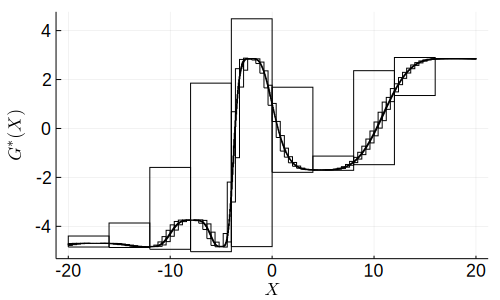

In [76]:
Qx_cover = cover_interval(Interval(-20, 20), 1000)
y_cover = map(G_full, Qx_cover)
xs, ys = rectangles_coords([Rectangle(x,y) for (x,y) in zip(Qx_cover, y_cover)])
p = plot(xs, ys, legend=false, color="black")

Qx_cover = cover_interval(Interval(-20, 20), 100)
y_cover = map(G_full, Qx_cover)
xs, ys = rectangles_coords([Rectangle(x,y) for (x,y) in zip(Qx_cover, y_cover)])
plot!(xs, ys, legend=false, color="black")

Qx_cover = cover_interval(Interval(-20, 20), 10)
y_cover = map(G_full, Qx_cover)
xs, ys = rectangles_coords([Rectangle(x,y) for (x,y) in zip(Qx_cover, y_cover)])
plot!(xs, ys, legend=false, color="black")

plot!(size=figstd)
plot!(xlabel=L"X", ylabel=L"G^{*}(X)")
savefig("fig_pow$(d)_deg$(N)_G_cover1.pdf")
display(p)

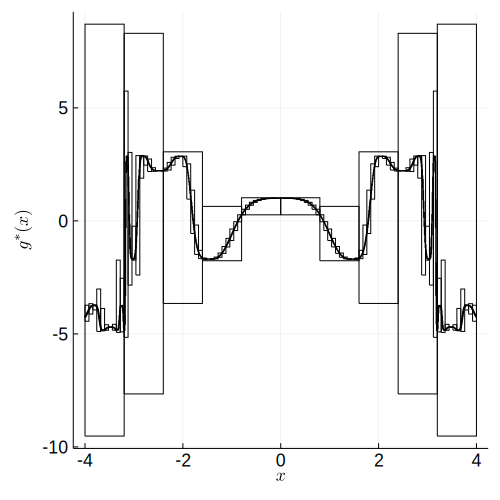

In [77]:
x_cover = cover_interval(Interval(-4, 4), 1000)
y_cover = map(x->G_full(Q(x)), x_cover)
xs, ys = rectangles_coords([Rectangle(x,y) for (x,y) in zip(x_cover, y_cover)])
p = plot(xs, ys, legend=false, color="black")

x_cover = cover_interval(Interval(-4, 4), 100)
y_cover = map(x->G_full(Q(x)), x_cover)
xs, ys = rectangles_coords([Rectangle(x,y) for (x,y) in zip(x_cover, y_cover)])
plot!(xs, ys, legend=false, color="black")

x_cover = cover_interval(Interval(-4, 4), 10)
y_cover = map(x->G_full(Q(x)), x_cover)
xs, ys = rectangles_coords([Rectangle(x,y) for (x,y) in zip(x_cover, y_cover)])
plot!(xs, ys, legend=false, color="black")

plot!(size=figsquare)
plot!(xlabel=L"x", ylabel=L"g^{*}(x)")
savefig("fig_pow$(d)_deg$(N)_g_cover1.pdf")
display(p)

## Spectral calculations

### Establishing universality

Compactness of $DT(G^{*})$ implies that the spectrum of $DT(G^{*})$ consists of the origin together with isolated eigenvalues of finite multiplicity (which accumulate at $0$).  We are interested primarily in establishing the hyperbolic structure of $DT(G^{*})$; apart from the non-essential eiegnvalue, $Q(\alpha)={\alpha_d}^d$, the only part of the spectrum outside the unit disc is the eigenvalue $\delta_d$ associated with critical scaling in the parameter space for the period-doubling cascade.  All other eigenvalues are contained in the interior of the unit disc.  Up to non-essential eigenvalues, this establishes the picture deduced by Feigenbaum, in which $G^{*}$ has one-dimensional unstable manifold with eigenvalue $\delta_d$ and co-dimension one stable manifold from which we conclude that families of maps with critical point of degree $d$ that exhibit a period doubling cascade and so (generically) cross the stable manifold transversally display an asymptotically self-similar bifurcation diagram with accumulation rate of period doublings give by $\delta_d$.

### Bounding the spectrum

We establish firstly that the spectrum has the form described above.  We make an invertible change of coordinates that puts $DT(G)$ into an almost-diagonal form $C^{-1}DT(G)C$ for all $G\in B_1$.  We then bound the resulting operator by a so-called contracted matrix $M$.  This is an $(m+1)\times(m+1)$ matrix of rectangles, with $m\le N$ with the property that if $\lambda=[a,b]+i[c,d]\subset\mathbb{C}$ is a rectangle containing an eigenvalue of $C^{-1}DT(G)C$, then taking the determinant $\det (M-\lambda I)$ using rectangle arithmetic (the natural complex analogue of interval arithmetic) yields a rectangle containing zero.  Thus, if the determinant is bounded away from zero, then we conclude that the rectangle $\lambda$ does not contain an eigenvalue.  We then consider a smooth one-parameter family of linear operators $\mu\mapsto L_\mu$ with $L_1 = M$ and $L_0=D$, a diagonal operator whose spectrum can therefore be determined trivially to have the correct form.

We may then identify disjoint circles $\Gamma_1,\Gamma_2,\Gamma_3$ chosen so that $\Gamma_1,\Gamma_2$ surround the expanding eigenvalues $\alpha_d^d$ and $\delta_d$ respectively, while $\Gamma_3$ surrounds the rest of the spectrum within the interior of the unit disc.  We note that the determinant is continuous in the linear operator and, by proving that $\mathrm{det}(L_\mu-\lambda I)$ is bounded strictly away from zero for all $\mu\in[0,1]$ and all $\lambda$ on each circle, and hence that no eigenvalue crosses the circles $\Gamma_1,\Gamma_2,\Gamma_3$, we establish that the spectrum of $DT(G^{*})$ has the same structure as that of $D$, with exactly one eigenvalue bounded within each of $\Gamma_1$ and $\Gamma_2$, and the rest of the spectrum bounded by $\Gamma_3$.  \cite{kato2013perturbation}.

In [75]:
# now we must decide what to do with the high-order
# and general bounds we could take each general
# bound [0, g] and add [-g, g] to every polynomial
# term for the high-order bound [0, h] we form
# [-h, h]+[-g, g].  in this way we form what i call
# the augmented matrix $M$

M_aug = [Interval(0) for j in 1:N+2, k in 1:N+2]

for k in 1:N+2
    b_H = balanced(DT_B1_E[k].std.H)
    b_G = balanced(DT_B1_E[k].std.G)
    for j in 1:N+1
        M_aug[j,k] = DT_B1_E[k].std.P.coeffs[j] + b_G
    end
    M_aug[N+2,k] = b_H + b_G
end
M_aug;

# ignoring the high-order parts yields the so-called PP matrix
M_PP = M_aug[1:N+1,1:N+1];

In [76]:
# we now find approximate eigvenvalues and vectors of the PP matrix

In [77]:
using GenericSchur

M_approx = map(i -> i.lo, M_PP)
@time vals_rev, vecs_rev = GenericSchur.eigen(M_approx);

1021.692555 seconds (6.57 G allocations: 816.439 GiB, 15.93% gc time)


In [78]:
vals = reverse(vals_rev)

481-element Array{Complex{BigFloat},1}:
      8.163158323607492932358696175387889811410458812092228420930400167230387207541840632011988411850526712859224599717030287533801686604200987376389684699029288086345132922319405168846722965781922245711136080900743606402153576035706139584071950268675589686392646176864681706069541504979828970227550390664853493688859202746645050319194149945192108675482560692398272430993906010851088740327401574072607496074037036334797444318545020265467252731674800835270735549647104489541755398977933846 + 0.0im
       7.2846862170733433643089305679955530694780466197997906590721212901883462143506762006572645031360371147078435786692555736933221121594917016705602726104142834709598228787329023878858672064166568189507310116581063173127916581632336626777465425277844176216835057574464163420527503774335848787292200823079125568047426483167232704969788293631101567459069647540690157414961317406641476839980296974720839969308999956761574428188950806631650454664736092011736498952

In [79]:
open(f -> serialize(f, vals), "feig_pow$(d)_deg$(N)_val.jls", "w")

In [81]:
vecs_rev_re = map(x->FloatType(x), vecs_rev)
vecs = vecs_rev_re[1:N+1,N+1:-1:1];

In [82]:
normalised_T = [vecs[:,k]/sum(map(abs, vecs[:,k])) for k in 1:N+1]
vecs = [normalised_T[k][j] for j in 1:N+1, k in 1:N+1];

In [83]:
eigen_error = sum(map(abs, M_PP*vecs[:,1] - vals[1]*vecs[:,1]))

Interval(0.0, 1.765452324799938066062419450442150765292587005009432400655106499782422309261907910734246309132794108080611099774919270713483059430556423618651177072418383483887291021764243640266526245772555031168140331070849339282714701135094493365552750901694445729852982498040651369822098716858962971969368282981628007574739346506494903351558750349940724968408932331996868273620426031013143755959863341928938291728284070608041916076547794590329465246389054762625288976406937060418069812063460712e-243)

In [687]:
function contract_matrix(A::Array{Rectangle, 2}, m::Integer)
    L1 = [Rectangle(0) for j in 1:m+1, k in 1:m+1]
    L1[1:m, 1:m] = A[1:m,1:m]
    for j in 1:m
        L1[j, m+1] = Rectangle(sum(map(x->balanced(abs(x)), A[j, m+1:N+1])))
    end
    for k in 1:m
        L1[m+1, k] = Rectangle(sum(map(x->balanced(abs(x)), A[m+1:N+1, k])))
    end
    L1[m+1,m+1] = Rectangle(sum(map(x->balanced(abs(x)), A[m+1:N+1, m+1:N+1])))
    L1
end

contract_matrix (generic function with 1 method)

In [690]:
function determinant(A_::Matrix)
    A = copy(A_)
    m, n = size(A)
    @assert m <= n
    
    prod = Interval(1)

    for k in 1:m
        # seek largest nonzero a[j,k] across j
        best, abs_best = k, abs(A[k,k])
        for i in k+1:m
            if abs(A[i,k]) > abs_best
                best, abs_best = i, abs(A[i,k])
            end
        end

        # swap rows to position pivot
        if k != best
            A[k,:], A[best,:] = A[best,:], A[k,:]
            prod = -prod
        end

        pivot = A[k,k]
        prod = prod * pivot

        # clear zeros below
        for k_that in k+1:m
            ratio = A[k_that,k]/A[k,k]
            for j in k:n
                A[k_that,j] -= ratio*A[k,j]
            end
        end
    end
    prod
end

determinant (generic function with 1 method)

In [576]:
function no_eigenvalue_crosses(Gamma, mus, L1)
    for mu in mus
        for gamma in Gamma
            Lmu_gamma = [j==k ? L1[j,k]-gamma : L1[j,k]*mu for j in 1:NN+1, k in 1:NN+1]
            det = determinant(Lmu_gamma)
            if Rectangle(0) in det
                println(gamma, mu, det)
                return false
            end
        end
    end
    return true
end

no_eigenvalue_crosses (generic function with 1 method)

In [ ]:
C = [Rectangle(0) for j in 1:N+2, k in 1:N+2]
C[1:N+1,1:N+1] = map(Rectangle, vecs)
C[N+2,N+2] = Rectangle(-1, 1)


L1_full = invert(C)*M_aug*C;

NN = 3 #works with at least 3
L1 = contract_matrix(L1_full, NN)

L0_eigenvalues = [L1[k,k] for k in 1:NN+1]

In [685]:
c1, r1 = L0_eigenvalues[1], Interval(0.000001)
c2, r2 = L0_eigenvalues[2], Interval(0.000001)

Gamma1 = cover_circle(c1, r1, 20);
Gamma2 = cover_circle(c2, r2, 20);

mus = cover_interval(Interval(0, 1), 1);

In [580]:
g1_uncrossed = no_eigenvalue_crosses(Gamma1, mus, L1)
g2_uncrossed = no_eigenvalue_crosses(Gamma2, mus, L1)

true

In [582]:
r3_lower = max(map(x->abs(x).hi, L0_eigenvalues[3:end])...)
c3, r3 = Rectangle(0), Interval(0.75)
Gamma3 = cover_circle(c3, r3, 1000);
mus = cover_interval(Interval(0, 1), 1);
g3_uncrossed = no_eigenvalue_crosses(Gamma3, mus, L1)

0.71300453634114152760276426070359484037339

In [584]:
no_eigenvalues_cross = g1_uncrossed && g2_uncrossed && g3_uncrossed

true

In [108]:
using LaTeXStrings
gr()

Plots.GRBackend()

In [ ]:
l = @layout [a b;c]

x1, y1 = rectangles_coords(Gamma1)
x2, y2 = rectangles_coords(Gamma2)
x3, y3 = rectangles_coords(Gamma3)

ts = [2pi*FloatType(k)/FloatType(50) for k in 0:50]
xs = map(cos, ts)
ys = map(sin, ts)

p1 = plot([x*r1.lo+c1.re.lo for x in xs],
    [y*r1.lo+c1.im.lo for y in ys],
    legend=false)
plot!(x1, y1, color=:black)
plot!([c1.re.lo], [c1.im.lo], marker=true)
annotate!(c1.re.lo, c1.im.lo+r1.lo*0.5, L"c_1", :black)
annotate!(c1.re.lo, c1.im.lo+r1.lo*1.5, L"\Gamma_1", :black)
plot!(xticks=[c1.re.lo])

p2 = plot([x*r2.lo+c2.re.lo for x in xs],
    [y*r2.lo+c2.im.lo for y in ys])
plot!(x2, y2, color=:black, legend=false)
plot!([c2.re.lo], [c2.im.lo], marker=true, legend=false)
annotate!(c2.re.lo, c2.im.lo+r2.lo*0.5, L"c_2", :black)
annotate!(c2.re.lo, c2.im.lo+r2.lo*1.5, L"\Gamma_2", :black)
plot!(xticks=[c2.re.lo])

p3 = plot(x3, y3, color=:black,
    legend=false, ratio=1, xlabel=L"x", ylabel=L"y")
#plot!([x*r3.lo+c3.re.lo for x in xs],
#      [y*r3.lo+c3.im.lo for y in ys], color=:red)
#plot!([c3.re.lo], [c3.im.lo], marker=true)
plot!([c2.re.lo], [c2.im.lo], marker=true)
plot!([c1.re.lo], [c1.im.lo], marker=true)
plot!(xs, ys, color=:red, linestyle=:dash)
annotate!(c1.re.lo, 0.75, L"\Gamma_1", :black)
annotate!(c2.re.lo, 0.75, L"\Gamma_2", :black)
annotate!(c3.re.lo, 0, L"\Gamma_3", :black)

p = plot(p2, p1, p3, layout=l, ratio=1)
plot!(size=figsquare)
savefig("fig_pow$(d)_deg$(N)_spectrum.pdf")
display(p)

In [110]:
alpha2_approx = c1 + balanced(Interval(r1))

Rectangle(Interval(-553.756808473554991398594943122326391031236792978080426073283239715800856417121481, 467.577360755209414674455537910335261208398102639520225402387454175104998984336594), Interval(-0.0, 0.0))

In [111]:
delta_approx = c2 + balanced(Interval(r2))

Rectangle(Interval(-529.31270822547623121064815005161269769073406941711547749827735893432809082765922, 632.834872603127191240761331576869640635972229755804577706589091358892268074817738), Interval(-0.0, 0.0))

## Bounding eigenfunctions and their eigenvalues

### Tight bounds on eigenfunctions

Next, we are able to find tight rigorous bounds on eigenfunction-eigenvalue pairs $(V, \lambda)$ by adapting the method used in the proof of existence for $G^{*}$ to the corresponding eigenproblem,
$$
(DT(G^{*})-\lambda I)V = 0.
$$
Specifically, we take $k$ to be the index of the first nonzero coefficient of the eigenfunction corresponding to $\alpha_d^d$ (resp. $\delta_d$), and define $\varphi$ to be the corresponding linear coordinate functional that yields the coefficient $a_k$ of a power series expanded with respect to $\Omega$ in our chosen basis.  We  choose a normalisation for the eigenfunctions that fixes the corresponding eigenvalue as the coefficent $a_k$ of $V$,
\begin{align*}
(V, \lambda)\mapsto \lambda\frac{V}{\varphi(V)},
\end{align*}
and solve the corresponding (nonlinear in $V$) eigenproblem
$$
F(V) \triangleq (DT(G^{*})-\varphi(V))V = 0,
$$

An initial guess, $V^0$, for the eigenfunction $V$ may be found by computing the correponding normalised eigenvector for the truncated problem nonrigorously and then employing a nonrigorous newton iteration to improve the initial guess.

### Newton's method for eigenfunctions

Following the method used for the existence proof, we then form a quasi-Newton operator, $\Psi$, whose fixed points are the relevant zeros.  We first note that $F$ has Frechet derivative given formally by
\begin{align*}
DF(V)\delta V &= DT(G^{*})\delta V - \varphi(\delta V)V - \varphi(V)\delta V.
\end{align*}
The quasi-Newton operator for this problem is given by
$$
\Psi:V \mapsto V - \widehat\Lambda\left[DT(G^{*})V - \varphi(V)V\right],
$$
in which we choose a fixed invertible linear operator $\widehat\Lambda$ such that for all $f\in B^3\triangleq B(V^{0};0,\widehat{\rho})$, we have
$$
\widehat\Lambda\delta V\simeq\left[DT(G^{*})\delta V-\varphi(\delta V)V^0-\varphi(V^0)\delta V\right]^{-1}.
$$
The Frechet derivative of the quasi-Newton operator is thus given by
\begin{align*}
D\Psi(V)\delta V 
&= \delta V - \widehat\Lambda\bigl[D{T}(G^{*})\delta V\nonumber\\
&\quad{}- \phi(\delta V)V - \phi(V)\delta V\bigr].
\end{align*}

### Choosing the fixed linear operator

As before, we aim to bound $\|\Psi(V^0)-V^0\|\le\widehat\epsilon$ via function ball operations on a singleton ball $B^2\triangleq B(V^0,0,0)$.  We must then bound $\|D\Psi(V)(e_k)\|\le\kappa<1$ for all $V\in B(V^0,0,\widehat\rho)$ and all $k\ge 0$.

Anticipating the dependency problem, we examine the linear operator, $\widehat\Lambda$ more closely.  We have
\begin{align*}
DF(V)\delta V
&= D{T}(G)\delta V - \varphi(\delta V)V - \varphi(V)\delta V\\
&= \left(D{T}(G) - Ve_k^{*} - V_kI\right)\delta V,\\
DF(V)
&\simeq \Delta - V^0e_k^{*} - V^0_kI,
\end{align*}
where $V^0$ is a suitable approximate eigenfunction and $e_k^{*}$ denotes the adjoint of the basis element $e_k$.  Recall that $\Delta\simeq DT(G^0)$, chosen so that its action on $H\mathscr{A}(\Omega)$ is zero.  In order to implement $\Lambda$ (which we choose to be the inverse of the above operator) we need to think about the action of the operator on the polynomial and high-order parts of the space.

Assume, without loss of generality, that $k=0$ so that $\varphi(V)=V_0$, where the subscript denotes the relevant power series coefficient, and for a suitable $V^0$ (chosen with $HV^0=0$) we may then take the (block diagonal) operator specified by

$$
\Gamma
=\Delta-V^0e_0^{*}-V^0_0I
=
\left(\begin{array}{cccc|c}
\Delta_{00}-2V^0_0 & \Delta_{01} & \cdots & \Delta_{0N} & 0\\
\Delta_{10}-V^0_1 & \Delta_{11}-V^0_0 & \cdots & \Delta_{1N} & 0\\
\vdots & \vdots & \ddots & \vdots & \vdots\\
\Delta_{N0}-V^0_N & \Delta_{N1} & \cdots & \Delta_{NN}-V^0_0 & 0\\
\hline
0 & 0 & \cdots & 0 & -V^0_0I
\end{array}\right).
$$

### Overcoming the dependency problem

Recall that
\begin{align*}
\Psi:V
&\mapsto V-\widehat\Lambda\bigl[DT(G)V - \varphi(V)V\bigr],
\end{align*}
with Frechet derivative
\begin{align*}
D\Psi(V):\delta V
&\mapsto \delta V - \widehat\Lambda\bigl[DT(G)\delta V\\
&\quad{}- \varphi(\delta V)V - \varphi(V)\delta V\bigr].
\end{align*}
We recall that multiple occurences of the perturbation $\delta V$ in an expression are treated as independent function balls in the rigorous computational framework, each contributing separately to the resulting norm.  There is therefore a dependency problem due to the terms $\delta V$ and $\widehat\Lambda\varphi(V)\delta V$ in the above.

To resolve this, consider the action of $D\Psi(V)$ on a high-order perturbation $\delta V_H\in H\mathscr{A}(\Omega)$:
\begin{align*}
D\Psi(V)\delta V_H
&=\delta V_H - \widehat\Lambda\bigl[DT(G)\delta V_H - \varphi(V)\delta V_H\bigr]
\nonumber\\
&=\left(1-\frac{\varphi(V)}{\varphi(V^0)}\right)\delta V_H - \widehat\Lambda DT(G)\delta V_H,
\end{align*}
since $\varphi(\delta V_H)=0$ and the action of $\widehat\Lambda$ on the high-order part of the space is given by $-(1/V^0_0)I$.  Note that for $V$ close to $V^0$, the contribution from the first term in the above expression is close to zero.

In order to avoid a bound on $\|D\Psi(B(V^0;0,\hat\rho))(E_{H})\|$ of approximately $2$, we therefore use the above expression for $D\Psi(V)\delta V_H$, with $V$ ranging over the ball $B(V^0;0,\widehat\rho)$, when computing $D\Psi(V)E_{H}$.

In [85]:
span(i::Interval) = Interval(0, (i-i).hi)

phi(p::Poly) = p.coeffs[1]
phi(b::Ball) = b.std.P.coeffs[1] + balanced(b.std.G)

phi (generic function with 2 methods)

In [86]:
phi(B0)

Interval(-0.0001511713350611291656840261159270919019237755709709817217414582918066104345259248288363569970343909936843052943870955651632007280456366801254175497134495694233204691022525525744921618127627868298306851128851750975628167740775703832655309932158811600523716590542438715231641835980685838847029840272029067002619921466762995716894749729845673437074840411354183275369302639495549917040846348438374204448591512104176151575095569520637713938254498790481918521467125822328947283541794235361, -0.0001511713350611291656840261159270919019237755709709817217414582918066104345259248288363569970343909936843052943870955651632007280456366801254175497134495694233204691022525525744921618127627868298306851128851750975628167740775703832655309932158811600523716590542438715231641835980685838847029840272029067002619921466762995716894749729845673437074840411354183275369302639495549917040846348438374204448591512104176151575095569520637713938254498790481918521467125822328947283541794235361)

In [87]:
span(phi(B0))

Interval(0.0, 0.0)

In [88]:
phi(B1)

Interval(-0.0001511713350611291656840261159270919019237755709709817217414582918066104345259248288363569970343909936843052943870955651632007280456366801254175497134495694233204691022525525744921618127627868298306851128851750975628167740775703832655309932158811700523716590542438715231641835980685838847029840272029067002619921466762995716894749729845673437074840411354183275369302639495549917040846348438374204448591512104176151575095569520637713938254498790481918521467125822328947283541794235363, -0.0001511713350611291656840261159270919019237755709709817217414582918066104345259248288363569970343909936843052943870955651632007280456366801254175497134495694233204691022525525744921618127627868298306851128851750975628167740775703832655309932158811500523716590542438715231641835980685838847029840272029067002619921466762995716894749729845673437074840411354183275369302639495549917040846348438374204448591512104176151575095569520637713938254498790481918521467125822328947283541794235359)

In [89]:
span(phi(B1))

Interval(0.0, 2.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000040560598066033950165559433185632502775370363022032202318925477132830459719131553514250993872847522042241983133781649386717659637500010842123028624490140475465679987031571494643988801175865370311701073960053590581346964981032588130602049462199194e-248)

In [90]:
i = 2
val_approx = vals[i]
vec_approx = vecs[1:end,i]

# normalize properly
f0_poly_coeffs = vec_approx/vec_approx[1]*val_approx.re
f0_poly_coeffs[1]

7.28468621707334336430893056799555306947804661979979065907212129018834621435067620065726450313603711470784357866925557369332211215949170167056027261041428347095982287873290238788586720641665681895073101165810631731279165816323366267774654252778441762168350575744641634205275037743358487872922008230791255680474264831672327049697882936311015674590696475406901574149613174066414768399802969747208399693089999567615744281889508066316504546647360920117364989525008086737128196284355865

In [91]:
f0_poly = Poly(f0_poly_coeffs, (c, r))

Poly(BigFloat[7.28468621707334336430893056799555306947804661979979065907212129018834621435067620065726450313603711470784357866925557369332211215949170167056027261041428347095982287873290238788586720641665681895073101165810631731279165816323366267774654252778441762168350575744641634205275037743358487872922008230791255680474264831672327049697882936311015674590696475406901574149613174066414768399802969747208399693089999567615744281889508066316504546647360920117364989525008086737128196284355865, 7.166839843174802185240988106002383404418656314690186789648785834704922987576719243423747105833600868983528368822807355106744968503966842727172637476672561126065250847979036977265282163648424498490228557339085255795987567947340782906010978017482707557745069034371643241108454556294175834159528329832924103935183959613996868190071960690086892164946663712755625646007926888572111758183796823060748387381584328947185930823413034002514968973874537849495177853640651278094474943797057728, -5.4330016762970599

In [92]:
abs(DTgn(f0_poly)-f0_poly*vals[i].re)

1.46311610065761877924550077875944183337701956896105745714835436811360444513193867687548628087987767583746278484395501938870450347899435775840481528369139810295691718194703713221191280379356897018559564389728196552641853963574924223455526790023951212950718744308252592268638454282474372804687603242159028495185908083774829065228078866033505170220572544397645989896348960491335496939810452485806428205015156198919863780591553257062843545618370733593338335844203303943570434151171482e-242

In [93]:
function newtonstep2(p::Poly)
    Fp = DTgn(p) - p.coeffs[1]*p
    Z = [FloatType(0) for j in 1:N+1,k in 1:N+1]
    for j in 1:N+1
        for k in 1:N+1
            if k == 1
                Z[j, k] += p.coeffs[j]
            end
            if j == k
                Z[j, k] += p.coeffs[1]
            end
        end
    end
    q = Poly(p.coeffs - inv(J-Z)*Fp.coeffs, p.cr)
    q, abs(Fp)
end

function newton2(p0::Poly, n::Integer)
    prev_error = FloatType(10)^10
    for k in 1:n
        p1, error = newtonstep2(p0)
        if error < prev_error
            println("$k: $error")
            p0 = p1
            prev_error = error
        else
            break
        end
    end
    p0
end

newton2 (generic function with 1 method)

In [94]:
@time fn = newton2(f0_poly, 20);

1: 1.46311610065761877924550077875944183337701956896105745714835436811360444513193867687548628087987767583746278484395501938870450347899435775840481528369139810295691718194703713221191280379356897018559564389728196552641853963574924223455526790023951212950718744308252592268638454282474372804687603242159028495185908083774829065228078866033505170220572544397645989896348960491335496939810452485806428205015156198919863780591553257062843545618370733593338335844203303943570434151171482e-242
2: 7.956679270147148191839291000184341746484311243654442894303738036350014911098409832507953095456436162012404442001416548237371715611468121333171153419587874921545851516879831132836757331746726819151098048960062335397053769408876233973387936814246286773272292641151257541210157876204747814277097618160228716030581769005680807063425332524623926697612830896293062870118529023685490721798592368948613916267084127254000981537898755561206707503200840521061692972632275907588577717553017782e-478
349.964124 seconds 

In [95]:
@time Delta_PP = matrix_elements(DTgn, poly_basis);

12575.018744 seconds (214.34 G allocations: 26.516 TiB, 18.35% gc time)


In [96]:
Delta_mod = [FloatType(0) for j in 1:N+1,k in 1:N+1]
for j in 1:N+1
    for k in 1:N+1
        Delta_mod[j,k] = Delta_PP[j,k]
        if k == 1
            Delta_mod[j,k] = Delta_mod[j,k] - fn.coeffs[j]
        end
        if j == k
            Delta_mod[j,k] = Delta_mod[j,k] - fn.coeffs[1]
        end
    end
end
Delta_mod;

In [97]:
L_pp = map(Interval, invert(Delta_mod));

# now we check that the resulting interval matrix is invertible
@time invert(L_pp);

707.293557 seconds (6.36 G allocations: 772.725 GiB, 26.96% gc time)


In [98]:
V0 = Ball(StdBall(Trunc(map(Interval, fn.coeffs)), FloatType(0), FloatType(0)), dom);

In [99]:
eigenfunction_error = abs(V0*phi(V0) - DT_B1(V0))

Interval(0.0, 2.428063306702828863801688614874825964775764430454313769202635948004874398511313603780955242629625774384390549983910272137268189622682478014778788705836553025584033823077115535427752617968012408386121077160926437056544711365555538204570767933124063371148397026270244758290089537177944644954029072254958648244424972487544174159276711644956098853562405337644563294999014303365347249026723300262160660017697303939032522107325668479836583364407917735870267326874167350827356682851006908e-244)

In [100]:
V0.dom == B1.dom

true

In [101]:
function Psi(v::Ball, L_pp::Array{Interval, 2})
    Psi_v = v - L_pp(DT_B1(v)-v*phi(v), -Interval(1)/V0.std.P.coeffs[1])
end

Psi (generic function with 1 method)

In [102]:
@time epsilon_hat = abs(Psi(V0, L_pp)-V0)

659.178278 seconds (7.60 G allocations: 919.690 GiB, 19.57% gc time)


Interval(0.0, 2.201614168519408260884812051206124695799226775026604385250789815824996405381189169766219048220690842923026421793379975873716085543898158933882397784140285899607898975627350443749541854806849474579852654268520726554891927880800827343618680222413624289219564375403728184928058216412715497508995093382125264618827759119563688723692967287390616055838501028861606996864243041395971970497091414188529705645034656991427429825708431298358230889223378912431599403402098170795207921275109488e-243)

In [103]:
rho_hat = FloatType(10)^Int(round(0.5+log10(epsilon_hat.hi)))

1.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001e-242

In [104]:
V1 = Ball(fn, 0, rho_hat);

In [105]:
println(phi(V1).lo)
println(phi(V1).hi)
println(1+rho_hat)

7.284686217073343364308930567995553069478046619799790659072121290188346214350676200657264503136037114707843578669255573693322112159491701670560272610414283470959822878732902387885867206416656818950731011658106317312791658163233662677746542527774419483203624379024983698686814670240496631580597051641021952709316631810627770212309827270388004315219769589240497007012034703312391566935975140847212718393271594886044390582023624173777975928937161929181991829013519209274967744586395844
7.284686217073343364308930567995553069478046619799790659072121290188346214350676200657264503136037114707843578669255573693322112159491701670560272610414283470959822878732902387885867206416656818950731011658106317312791658163233662677746542527794419483203624379024983698686814670240496631580597051641021952709316631810627770212309827270388004315219769589240497007012034703312391566935975140847212718393271594886044390582023624173777975928937161929181991829013519209274967744586395853
1.00000000000000000000000000000000

In [106]:
rho_hat

1.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001e-242

In [107]:
function DPsi(b::Ball, L_pp::Array{Interval, 2})
    function DPsi_b(db::Ball)
        DF = DTb1(db)-phi(b)*db-phi(db)*b
        DPsi_b_db = db - L_pp(DF, -Interval(1)/phi(V0))
    end
    DPsi_b
end

function bound_kappa_hat_naively(b::Ball, L_pp)
    DPsi_b_es = [E[k] - L_pp(DT_B1_E[k]-phi(b)*E[k]-phi(E[k])*b, -Interval(1)/phi(V0)) for k in 1:N+2]
    norms = map(abs, DPsi_b_es)
end

bound_kappa_hat_naively (generic function with 1 method)

In [108]:
EH = basis_element(V1, N+1)
DT_G_EH = DT_B1(EH)
DPsi_V1_EH = (Interval(1)-phi(V1)/phi(V0))*EH -L_pp(DT_G_EH, -Interval(1)/phi(V0))
norm_H = abs(DPsi_V1_EH)

Interval(0.0, 2.435084174957329195409137991824364129441041376873275687368678967724911626117619644291936273375475896658822556346717736321985294964098517323653817283541447947463854470708265537526960423291225468880177128516007778210606497626759813857723008264675757747251460405959316258542554234029969384032124853596505769975676377510955817636329681978957140693382919714840988743055633266524810424645881219151046268725285927118980954628464582756141454389677025369503629670888050053395430944294552376e-45)

In [109]:
@time norms = bound_kappa_hat_naively(V1, L_pp)

538.317294 seconds (4.29 G allocations: 525.249 GiB, 13.99% gc time)


482-element Array{Interval,1}:
 Interval(0.0, 6.958192445264483148281669444839961297452024370736862349289090068273546010107472176944605074625961386561584357739793020729191956898972631225586432424512455831369896476489243549679923242524969521723962323305713948093739304881513472704472396763450047176965550343996392498636229160163987572090206698698615043443823409834299760007256877327847816228794482994278126059927646768027395817671031202455108467658531429582228305716638919173253361791900930323778726506135913774866632941980078701e-241)
 Interval(0.0, 1.3877684590475775878613322621247070179345432915991830768458135824549388318694896125770292442268895833602279613965887837116305341342089426627174006413952494688461694619109695521275960071124827490457755595977656609477337439094266571034668573967049952283225087083902760567825912851514519119721902958273200070112005208685681672593258173640300426792852740071949966703522690980529912287544645096512262274318936978334258744374979646000344866411620369317412

In [110]:
norms[end] = norm_H
kappa_hat = hull(norms)

Interval(0.0, 9.989614124579540962214994733170713638572493214925163613274937656703351735432456402162743312365461066927071958931431393286601257188760874236341105051972227747750566896099267789595135683331590598735424634167255941735590117828270619834769565247960665408256468893443618242092564781798673525182557302300554070084468588667175679190653498199485009541788939526365167236774775979702094622027559697955194282595186435385817545522093440961767858903035727925168261758794649068359653257347763681e-37)

Using the same parameters as before, we obtain rigorous bounds
$\|\Psi(V^0)-V^0\|<\widehat{\varepsilon}=3.3559\times 10^{-12}$,
$\widehat{\rho}=10^{-11}$, and
$\|D\Psi(B(V^0;0,\widehat{\rho}))\|<\widehat{\kappa}=0.001169$, which establishes that $\Psi$ is indeed a contraction mapping on $B(V^0;0,\widehat{\rho})$.  The eigenvalue satisfies $\delta_4\in[7.28468621706,7.28468621709]$.  Using a higher precision and higher truncation degree yields tighter rigorous bounds on both the eigenvalue and on the coefficients of the corresponding eigenfunction $V^{*}$.

In [111]:
epsilon_hat < rho_hat*(Interval(1)-kappa_hat)

true

In [112]:
epsilon_hat

Interval(0.0, 2.201614168519408260884812051206124695799226775026604385250789815824996405381189169766219048220690842923026421793379975873716085543898158933882397784140285899607898975627350443749541854806849474579852654268520726554891927880800827343618680222413624289219564375403728184928058216412715497508995093382125264618827759119563688723692967287390616055838501028861606996864243041395971970497091414188529705645034656991427429825708431298358230889223378912431599403402098170795207921275109488e-243)

In [113]:
rho_hat*(Interval(1)-kappa_hat)

Interval(9.999999999999999999999999999999999990010385875420459037785005266829286361427506785074836386725062343296648264567543597837256687634538933072928041068568606713398742811239125763658894948027772252249433103900732210404864316668409401264575365832744058264409882171729380165230434752039334591743531106556381757907435218201326474817442697699445929915531411332824320809346501800514990458211060473634832763225224020297905377972440302044805717404813564614182454477906559038232141096964272066e-243, 1.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001e-242)

#### Evaluating the derivative of $G$ over larger domains

We can use the fixed-point equation for $G$:
\begin{equation}
G(X) = a^{-1}G(Q(G(Q(a)X))).
\end{equation}
Differentiating gives
\begin{align*}
G'(X) &= a^{-1}G'(Q(G(Q(a)X)))\cdot Q'(G(Q(a)X))\\
&\quad{}\cdot G'(Q(a)X)\cdot Q(a).
\end{align*}
Using the above expression (together with the fixed-point equation for $G$) recursively allows us to bound $G'$ over larger intervals extending outside $\Omega$.

### Evaluating the eigenfunction on larger intervals

Finally, combining the fixed-point equation for $G$, the recurrence for $G'$, and the recurrence for $V$ shown here

\begin{align*}
V(X)
&= \delta^{-1}DT(G)V(X)\\
&= \delta^{-1}\bigl[-a^{-2}V(1) \cdot G(Q(G(Q(a)X)))\\
&\quad{}+ a^{-1}\cdot V(Q(G(Q(a)X)))\\
&\qquad{}+ a^{-1}\cdot G'(Q(G(Q(a)X)))\cdot Q'(G(Q(a)X))\cdot V(Q(a)X)\\
&\qquad\quad{}+ a^{-1}\cdot G'(Q(G(Q(a)X)))\cdot Q'(G(Q(a)X))\cdot G'(Q(a)X)\cdot Q'(a)V(1)\cdot X\bigr],
\end{align*}

where $a=G(1)$ and $\delta=\varphi(V)$, allows us to evaluate the eigenfunction $V(X)$ itself, and hence $v(x)=V(x^d)$, the corresponding eigenfunction for the derivative of the original renormalisation operator, over larger subintervals of the real line.

In [114]:
function make_Gdash_full(G, G_full)
    a = G(1)
    Gdash = diff(G)
    c, r = G.cr
    
    function Gdash_full(x)
        
        if abs(x-c) < r
            return Gdash(x)
        else
            Qax = Q(a)*x
            GQax = G_full(Qax)
            QGQax = Q(GQax)
    
            GdashQax = Gdash_full(Qax)
            GdashQGQax = Gdash_full(QGQax)
        
            return GdashQGQax*Qdash(GQax)*GdashQax*Q(a)/a
        end
    
    return Gdash_full
    end
end

make_Gdash_full (generic function with 1 method)

In [115]:
function make_V_full(G, G_full, Gdash_full, V)
    a = G(1)
    delta = phi(V)

    function V_full(X)
        if abs(X-c) < r
            return V(X)
        else
            QaX = Q(a)*X
            GQaX = G_full(QaX)
            QGQaX = Q(GQaX)
            GQGQaX = G_full(QGQaX)
            
            GdashQaX = Gdash_full(QaX)
            GdashQGQaX = Gdash_full(QGQaX)
        
            t1 = -1/a^2*V(1)*GQGQaX
            t2 = 1/a*V_full(QGQaX)
            t3 = 1/a*GdashQGQaX*Qdash(GQaX)*V_full(QaX)
            t4 = 1/a*GdashQGQaX*Qdash(GQaX)*GdashQaX*Qdash(a)*V(1)*X
            
            total = t1+t2+t3+t4
        
            return total/delta
        end
    end
    return V_full
end

make_V_full (generic function with 1 method)

In [116]:
Gdash_full = make_Gdash_full(gn, gn_full)
V_full = make_V_full(gn, gn_full, Gdash_full, fn)

V_full (generic function with 1 method)

In [117]:
println(phi(V1).lo)
println(phi(V1).hi)
println(1+rho_hat)

7.284686217073343364308930567995553069478046619799790659072121290188346214350676200657264503136037114707843578669255573693322112159491701670560272610414283470959822878732902387885867206416656818950731011658106317312791658163233662677746542527774419483203624379024983698686814670240496631580597051641021952709316631810627770212309827270388004315219769589240497007012034703312391566935975140847212718393271594886044390582023624173777975928937161929181991829013519209274967744586395844
7.284686217073343364308930567995553069478046619799790659072121290188346214350676200657264503136037114707843578669255573693322112159491701670560272610414283470959822878732902387885867206416656818950731011658106317312791658163233662677746542527794419483203624379024983698686814670240496631580597051641021952709316631810627770212309827270388004315219769589240497007012034703312391566935975140847212718393271594886044390582023624173777975928937161929181991829013519209274967744586395853
1.00000000000000000000000000000000

In [ ]:
xs = linspace(-25, 25, 1000)
ys = map(x->V_full(x), xs)
p = plot(xs, ys, legend=false)

plot!(xlabel=L"X", ylabel=L"V^{*}(X)")
plot!(figsize=figstd)
savefig("fig_pow$(d)_deg$(N)_delta_x.pdf")
display(p)

In [ ]:
xs = linspace(-2.8, 2.8, 1000)
ys = map(x->V_full(Q(x)), xs)
p = plot(xs, ys, legend=false)

vline!([c^(1/d)], color=:red, linestyle=:dash)
vline!([-c^(1/d)], color=:red, linestyle=:dash)
hline!([V_full(c)], color=:red, linestyle=:dash)
plot!([c^(1/d)], [V_full(c)], color=:red, marker=true)
annotate!(c^(1/d)-0.3, -90, L"c^{1/4}")
annotate!(-2.7, V_full(c)+6, L"\delta_4")
plot!(xlabel=L"x", ylabel=L"v^{*}(x)")
plot!(figsize=figstd)
savefig("fig_pow$(d)_deg$(N)_delta_Qx.pdf")
display(p)

### Noise eigenproblem

Adapting the arguments presented in \cite{crutchfield1981scaling}, we write $\theta=K\circ Q$ and consider the eigenproblem
$$
\gamma^2K = \mathcal{L}K,
$$
in which we define the operator
$$
\mathcal{L}K
\triangleq {F_1}^2\cdot K(Q(G(Q(a)X))) + {F_2}^2\cdot K(Q(a)X),
$$
where
\begin{align*}
F_1 &\triangleq a^{-1},\\
F_2 &\triangleq a^{-1}G'(Q(G(Q(a)X)))\cdot Q'(G(Q(a)X)),
\end{align*}
in which $G=G^{*}$.  As before, we encode the eigenvalue within $K$ by defining $\gamma=\varphi(K)$ and expressing the problem as
$$
\mathcal{F}(V)
\triangleq \left(\mathcal{L}-\varphi(V)^2I\right)V
= 0.
$$

In [182]:
function make_noise_functions(G)
    
    a = G(1)
    
    X = identity(G)
    XQa = X*Q(a)
    GXQa = G(XQa)
    QGXQa = Q(GXQa)
    GQGXQa = G(QGXQa)
    
    Gdash = diff(G)
    GdashQa = Gdash(XQa)
    GdashQGXQa = Gdash(QGXQa)
    
    t2 = (1/a^2)
    t3 = ((1/a)*GdashQGXQa*Qdash(GXQa))^2
    
    function T_noise(H)
        term2 = t2*H(QGXQa)
        term3 = t3*H(XQa)
        lhs = term2 + term3
        return lhs
    end

    function DT_noise(H)
        function DT_noise_H(K)
            term2 = t2*K(QGXQa)
            term3 = t3*K(XQa)
            lhs = term2 + term3
            return lhs
        end
        return DT_noise_H
    end

    function F_noise(H)
        lhs = T_noise(H)
        rhs = phi(H)^2*H
        return lhs - rhs
    end
    
    function DF_noise(H)
        function DF_noise_H(K)
            term2 = t2*K(QGXQa)
            term3 = t3*K(XQa)
            lhs = term2 + term3
            rhs = 2*phi(H)*phi(K)*H + phi(H)^2*K
            return lhs - rhs
        end
        return DF_noise_H
    end
    
    return T_noise, DT_noise, F_noise, DF_noise
end

make_noise_functions (generic function with 1 method)

In [183]:
T_noise, DT_noise, F_noise, DF_noise = make_noise_functions(gn)

(T_noise, DT_noise, F_noise, DF_noise)

In [184]:
function newtonstep3(p::Poly)
    F_noise_p = F_noise(p)
    
    DF_noise_p = DF_noise(p)
    Gamma_noise_inv = matrix_elements(DF_noise_p, poly_basis);
    
    q = Poly(p.coeffs - inv(Gamma_noise_inv)*F_noise_p.coeffs, p.cr)
    q, abs(F_noise_p)
end

function newton3(p0::Poly, n::Integer)
    basis = [basis_element(p0, k) for k in 0:N]
    prev_error = FloatType(10)^10
    for k in 1:n
        p1, error = newtonstep3(p0)
        if error < prev_error
            println("$k: $error")
            p0 = p1
            prev_error = error
        else
            break
        end
    end
    p0
end

newton3 (generic function with 1 method)

In [213]:
coeffs1 =
    [8.2439108542525868183984681407274856816085,
    -6.0322692848423565907631247618118981393342,
    -0.9982018393488768212870485551214219254545,
    2.6363800355754879012771730485765483764323,
    -0.81417961982144934477652907400079088030452,
    -0.29147766969741484217408543902920290946857,
    0.27453720705501139995416236362187753319358,
    -0.046331257143063931623549911903423858651957,
    -0.030017704341870982098524088054522772307919,
    0.017474061081596975586192745938250892421782]

v_noise_0 = Poly([k <= length(coeffs1) ? FloatType(coeffs1[k]) : FloatType(0) for k in 1:N+1], (c, r))
v_noise_0(0), phi(v_noise_0)

(10.96306465013629191350963726052183247014348961115034780507490478132504030384097859496250748634338378906249999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999, 8.243910854252586517532108700834214687347412109375)

In [ ]:
v_noise_n = newton3(v_noise_0, 20);

In [ ]:
phi(v_noise_n)

In [ ]:
open(f -> serialize(f, v_noise_n), "feig_pow$(d)_deg$(N)_pre$(P)_noise_n.jls", "w")

In [ ]:
v_noise_n = deserialize("feig_pow$(d)_deg$(N)_pre$(P)_noise_n.jls")

In [ ]:
function make_K_full(G, G_full, Gdash_full, K)
    a = G(1)
    gamma = phi(K)
    c, r = G.cr
    
    function K_full(x)
        if abs(x-c) < r
            return K(x)
        else
            Qax = Q(a)*x
            GQax = G_full(Qax)
            QGQax = Q(GQax)
            GQGQax = G_full(QGQax)
        
            F1 = 1/a
            F2 = Gdash_full(QGQax)*Qdash(GQax)/a
        
            return (F1^2*K_full(QGQax)+F2^2*K_full(Qax))/gamma^2
        end
    end
    return K_full
end

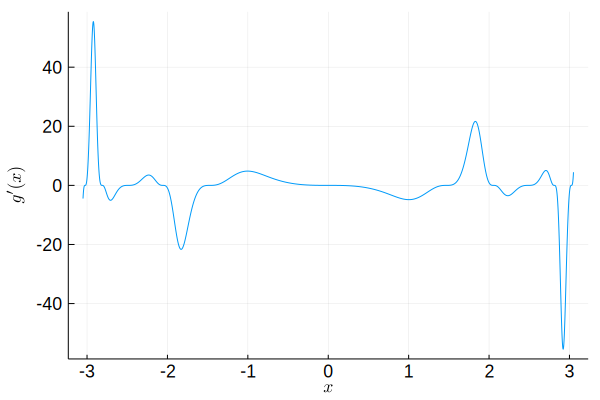

In [150]:
xs = linspace(-3.05, 3.05, 5000)
zs = map(x->Gdash_full(Q(x))*Qdash(x), xs)
plot(xs, zs, legend=false)
plot!(figsize=figstd)
plot!(xlabel=L"x", ylabel=L"g'(x)")

In [ ]:
K_full = make_K_full(gn, gn_full, Gdash_full, v_noise_n)

In [ ]:
using Plots
using LaTeXStrings

xs = linspace(-20, 20, 1500)
ys = map(K_full, xs)
p = plot(xs, ys, legend=false)
vline!([c], color=:red)
hline!([K_full(c)], color=:red)

plot!(xlabel=L"X", ylabel=L"K^{*}(X)")
plot!(figsize=figstd)
savefig("fig_pow$(d)_deg$(N)_noise_Qx.pdf")
display(p)

In [ ]:
xs = linspace(-3.155, 3.155, 1500)
ys = map(x->K_full(Q(x)), xs)
p = plot(xs, ys, legend=false)
vline!([c^(1/d)], color=:red, linestyle=:dash)
vline!([-c^(1/d)], color=:red, linestyle=:dash)
hline!([K_full(c)], color=:red, linestyle=:dash)
plot!([c^(1/d)], [K_full(c)], color=:red, marker=true)

plot!(xlabel=L"x", ylabel=L"K(Q(x))")
annotate!(c^(1/d)-0.3, 0.5, L"c^{1/4}")
annotate!(-3, K_full(c)+0.5, L"\gamma_4")
plot!(xlabel=L"x", ylabel=L"k^{*}(x)")
plot!(figsize=figstd)
savefig("fig_pow$(d)_deg$(N)_noise_x.pdf")
display(p)

In [ ]:
xs = linspace(-8, 8, 1500)
ys = map(x->K_full(Q(x)), xs)

p = plot(xs, ys, yaxis=:log, legend=false)
plot!(xlabel=L"x", ylabel=L"K(Q(x))")
plot!(figsize=figstd)

savefig("fig_pow$(d)_deg$(N)_noise_x_large.pdf")
display(p)

The operator $\mathcal{F}$ has Frechet derivative
\begin{align*}
D\mathcal{F}(K):\delta K
&\mapsto \mathcal{L}\delta K - 2\varphi(K)\varphi(\delta K)K - \varphi(K)^2\delta K.
\end{align*}

We form the quasi-Newton operator
$$
\Theta(K) \triangleq K-\Lambda\mathcal{F}(K),
$$
where $\Lambda$ is a fixed linear operator $\Lambda\simeq[D\mathcal{F}(K^0)]^{-1}$.
The Frechet derivative is given by
\begin{align*}
&D\Theta(K)\delta K\\
&= \delta K-\Lambda D\mathcal{F}(K)\delta K\\
&= \delta K-\Lambda\bigl[\mathcal{L}\delta K - 2\varphi(K)\varphi(\delta K)K - \varphi(K)^2\delta K\bigr].
\end{align*}
In particular, we take
$$
D\mathcal{F}(K)\simeq\mathcal{L}-2\varphi(K^0)K^0e_0^{*}-\varphi(K^0)^2I,
$$
choosing $K^0$ such that $HK^0=0$, and take $\Lambda$ to be the inverse operator, which therefore has the following action on high-order terms
$$
\Lambda\delta K_H = -\frac{1}{\varphi(K^0)^2}\delta K_H.
$$

To mitigate the dependency problem, we compute the action of $D\Theta(K)$ on a high-order perturbation $\delta K_H\in H\mathscr{A}(\Omega)$:
$$
D\Theta(K)\delta K_H
=\left[1-\left(\frac{\varphi(K)}{\varphi(K^0)}\right)^2\right]\delta K_H - \Lambda\mathcal{L}\delta K_H.
$$

In [ ]:
@time Lambda_PP_inv_noise = matrix_elements(DF_noise(v_noise_n), poly_basis);

In [ ]:
@time Lambda_PP_noise = map(Interval, invert(Lambda_PP_inv_noise));

In [ ]:
@time Lambda_PP_noise_inv_check = invert(Lambda_PP_noise);

In [ ]:
T_noise, DT_noise, F_noise, DF_noise = make_noise_functions(B1)

function Phi_noise(b::Ball)
    b - Lambda_PP_noise(F_noise(b), -1/phi(b)^2)
end

In [ ]:
B0_noise = Ball(v_noise_n, FloatType(0), FloatType(0));

In [ ]:
@time epsilon_noise = abs(Phi_noise(B0_noise) - B0_noise)

In [ ]:
rho_noise = Interval(FloatType(10)^Int(round(0.5+log10(epsilon_noise.hi))))

In [ ]:
B1_noise = Ball(v_noise_n, FloatType(0), FloatType(rho_noise.hi));

In [ ]:
println(phi(B1_noise).lo)
println(phi(B1_noise).hi)
println(1+rho_noise.hi)

In [ ]:
K_full(Q(c^(1/d)))

In [ ]:
c^(1/d)

In [ ]:
function DPhi_noise(b::Ball, L_pp::Array{Interval, 2})
    DF_noise_b = DF_noise(b)
    function DPhi_noise_b(db::Ball)
        DF = DF_noise_b(db)
        DPhi_b_db = db - L_pp(DF, -Interval(1)/phi(V0)^2)
    end
    DPhi_noise_b
end

function bound_kappa_noise_naively(b::Ball, L_pp)
    DPhi_noise_b = DPhi_noise(b, L_pp)
    DPhi_noise_b_es = map(DPhi_noise_b, E)
    norms = map(abs, DPhi_noise_b_es)
    norms
end

In [ ]:
EH = basis_element(B1_noise, N+1)
DT_noise_B1_EH = DT_noise(B1_noise)(EH)
DPhi_noise_B1_EH = (Interval(1)-(phi(B1_noise)/phi(B0_noise))^2)*EH -L_pp(DT_noise_B1_EH, -Interval(1)/phi(V0))
norm_H = abs(DPhi_noise_B1_EH)

In [ ]:
@time norms = bound_kappa_noise_naively(B1_noise, Lambda_PP_noise);

In [ ]:
norms[end] = norm_H
kappa_noise = Interval(hull(norms).hi)

Using the same parameters as above, we obtain $\|\Theta(K^0)-K^0\|<\tilde{\varepsilon}=2.3422\times 10^{-12}$, $\tilde{\rho}=10^{-11}$, and $\|D\Theta(B(K^0;0,\tilde{\rho}))\|<\tilde{\kappa}=0.0078443$, establishing that $\Theta$ is a contraction on $B(K^0;0,\tilde{\rho})$.  Working with truncation degree $40$ and $40$ digits in the significand yields the crude bound $\gamma\in[8.24391085424, 8.24391085427]$ for the noise eigenvalue.

In [ ]:
noise_existence = epsilon_noise < rho_noise*(Interval(1)-kappa_noise)

In [ ]:
epsilon_noise

In [ ]:
rho_noise

In [196]:
kappa_noise

Interval(9.989614124579540962214994733170713638572493214925163613274937656703351735432456402162743312365461066927071958931431393286601257188760874236341105051972227747750566896099267789595135683331590598735424634167255941735590117828270619834769565247960665408256468893443618242092564781798673525182557302300554070084468588667175679190653498199485009541788939526365167236774775979702094622027559697955194282595186435385817545522093440961767858903035727925168261758794649068359653257347763681e-37, 9.989614124579540962214994733170713638572493214925163613274937656703351735432456402162743312365461066927071958931431393286601257188760874236341105051972227747750566896099267789595135683331590598735424634167255941735590117828270619834769565247960665408256468893443618242092564781798673525182557302300554070084468588667175679190653498199485009541788939526365167236774775979702094622027559697955194282595186435385817545522093440961767858903035727925168261758794649068359653257347763681e-37)

## Domain of analyticity

We now use the fixed-point equations
$$
g^{*}(z) = a^{-1}g^{*}(g^{*}(az)),
$$
and
$$
G^{*}(Z) = a^{-1}G^{*}(Q(G^{*}(Q(a)Z))),
$$
to find analytic continuations of $G^{*}$ and $g^{*}=G^{*}\circ Q$ to larger domains than $\Omega$ and $Q^{-1}(\Omega)$ respectively (here, $Q^{-1}(\Omega)$ denotes the preimage of $\Omega$ under $Q$).  We categorise points $z\in\mathbb{C}$ according to whether $g^{*}(z)$ may be evaluated by using the power series obtained for $G^{*}$ directly for $Z=Q(z)=z^d\in\Omega$, and indirectly for $Z\not\in\Omega$ by using the fixed point equation recursively.  The latter results in a binary tree of recursive evaluations of $g$, which we terminate after a maximum recursion depth is reached.  Secondly, for those points at which $g^{*}$ may indeed be evaluated, subject to that maximum recursion depth, we classify points according to whether $g^{*}(z)\in\mathbb{H}_{-}$ or $g^{*}(z)\in\mathbb{H}_{+}$ (\cite{nauenberg1987fractal} and \cite{buff1999geometry}).

In [152]:
function categorise(t::Tuple{Complex{FloatType},Int64})
    z, d = t
    if d > MAX_DEPTH
        return 2
    elseif z.im == 0
        return 0
    elseif z.im < 0
        return -1
    else
        return 1
    end
end

categorise (generic function with 1 method)

We define the following function $\mathcal{G}:\mathbb{C}\to\mathbb{C}\times(\mathbb{Z}\cup\{\infty\})$:
$$
\mathcal{G}(Z, d)
\triangleq
\begin{cases}
(0,\ \infty)\ \mbox{if $d<0$,}\\
(G^{*}(Z),\ 0)\ \mbox{if $d\ge 0,\ Z\in\Omega$,}\\
(a^{-1}Y,\ \mathrm{max}(d_1,d_2)+1)\ \mbox{otherwise},
\end{cases}
$$
where
\begin{align*}
(X, d_1) &\triangleq \mathcal{G}(Q(a)Z,\ d-1),\\
(Y, d_2) &\triangleq \mathcal{G}(Q(X),\ d-1).
\end{align*}

In [306]:
MAX_DEPTH = 6

function depth(z::Complex{FloatType}, max_depth::Integer)::Tuple{Complex{FloatType}, Int64}
    if max_depth < 0
        return (Complex{FloatType}(0), MAX_DEPTH+1)
    elseif abs(z-Complex{FloatType}(c)) < r
        return (gn(z), 0)
    else
        a = gn(1)
        x, depth1 = depth(Q(a)*z, max_depth-1)
        y, depth2 = depth(Q(x), max_depth-1)
        return (y/a, max(depth1, depth2) + 1)
    end
end

depth (generic function with 1 method)

In [307]:
depth(Complex{FloatType}(0, 1), 2)

(0.90405488429442685494248858620090993265256683050456609388523410678430526171931667 - 2.18527986854845160778925809907554438181751227960975365111340956469880221701507015im, 2)

In [308]:
function linspace2(zc::Complex{FloatType}, zr::FloatType, n::Integer)
    i = Complex{FloatType}(0, 1)
    xs = linspace(zc.re-zr, zc.re+zr, n)
    ys = linspace(zc.im-zr, zc.im+zr, n)
    zs = [x+y*i for y in ys, x in xs]
    xs, ys, zs
end

linspace2 (generic function with 1 method)

In [309]:
Qzs_re, Qzs_im, Qzs = linspace2(Complex{FloatType}(0, 0), FloatType(Q(4)), 1+1024)
#@time data_Qz = map(Qz->depth(Qz, MAX_DEPTH), Qzs);

In [310]:
zs_re, zs_im, zs = linspace2(Complex{FloatType}(0, 0), FloatType(4), 1+1024)
#@time data_z = map(z->depth(Q(z), MAX_DEPTH), zs);

In [311]:
#open(f -> serialize(f, data_Qz), "feig_pow$(d)_deg$(N)_data_Qz_4.jls", "w")
#open(f -> serialize(f, data_z), "feig_pow$(d)_deg$(N)_data_z_4.jls", "w")

In [313]:
using Serialization
data_Qz = deserialize(open("feig_pow4_deg40_data_Qz_4.jls"));
data_z = deserialize(open("feig_pow4_deg40_data_z_4.jls"));

In [314]:
cat_Qz = map(categorise, data_Qz);
cat_z = map(categorise, data_z);

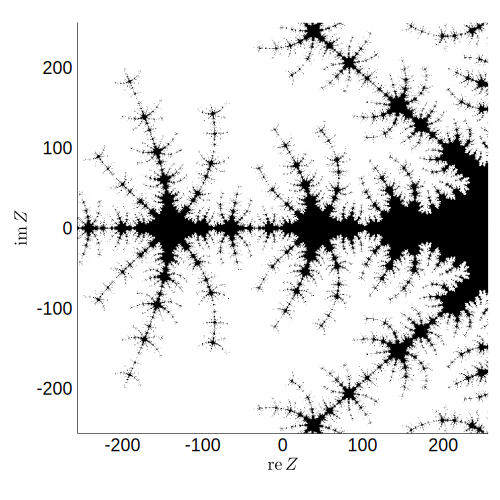

In [315]:
p = heatmap(Qzs_re, Qzs_im, cat_Qz, #depths_Qz,
    #size=(1+512, 1+512),
    ratio=1, c=cgrad([:black, :black, :black, :white]),
    xlims=(min(Qzs_re...), max(Qzs_re...)),
    ylims=(min(Qzs_im...), max(Qzs_im...)), legend=false)
plot!(xlabel=L"\mathrm{re}\,Z", ylabel=L"\mathrm{im}\,Z")
plot!(size=figsquare);
savefig("fig_pow4_deg80_dep08_qz_4_bw.pdf")
display(p)

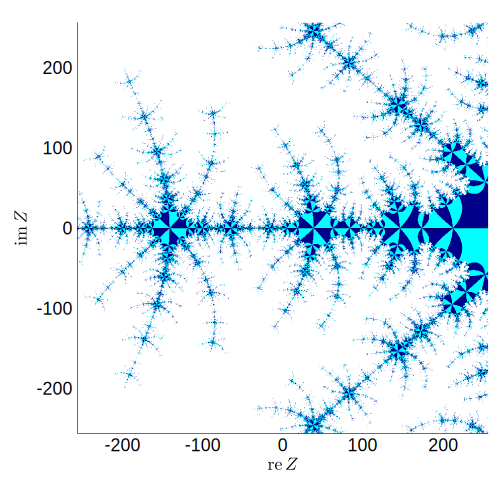

In [316]:
p = heatmap(Qzs_re, Qzs_im, cat_Qz,
    #size=(1+512, 1+512),
    ratio=1, c=cgrad([:darkblue, :black, :cyan, :white]),
    xlims=(min(Qzs_re...), max(Qzs_re...)),
    ylims=(min(Qzs_im...), max(Qzs_im...)), legend=false)

plot!(xlabel=L"\mathrm{re}\,Z", ylabel=L"\mathrm{im}\,Z")
plot!(size=figsquare);
savefig("fig_pow4_deg80_dep08_qz_4_col.pdf")
display(p)

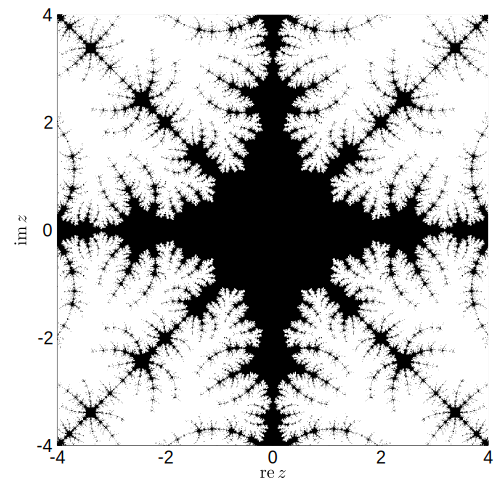

In [317]:
p = heatmap(zs_re, zs_im, cat_z,
    #size=(1+512, 1+512),
    ratio=1, c=cgrad([:black, :black, :black, :white]),
    xlims=(min(zs_re...), max(zs_re...)),
    ylims=(min(zs_im...), max(zs_im...)), legend=false)

plot!(xlabel=L"\mathrm{re}\,z", ylabel=L"\mathrm{im}\,z")
plot!(size=figsquare);
savefig("fig_pow4_deg80_dep08_z_4_bw.pdf")
display(p)

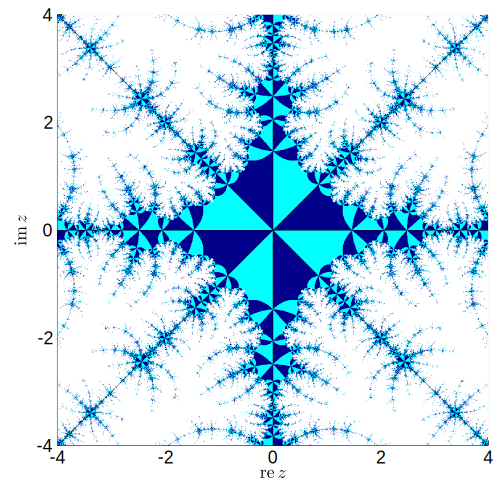

In [318]:
p = heatmap(zs_re, zs_im, cat_z,
    #size=(1+512, 1+512),
    ratio=1, c=cgrad([:darkblue, :black, :cyan, :white]),
    xlims=(min(zs_re...), max(zs_re...)),
    ylims=(min(zs_im...), max(zs_im...)), legend=false)

plot!(xlabel=L"\mathrm{re}\,z", ylabel=L"\mathrm{im}\,z")
plot!(size=figsquare);
savefig("fig_pow4_deg80_dep08_z_4_col.pdf")
display(p)

In [ ]:
println("Degree of map at critical point, d:\n$(d)")
println("Domain centre, c:\n$(c)")
println("Domain radius, r:\n$(r)")
println("Truncation degree, N:\n$(N)")
println("Precision (digits approx.), P:\n$(P)")

println("\nepsilon:\n$(epsilon.hi)")
println("rho:\n$(rho)")
println("kappa:\n$(kappa)")

println("\nepsilon_hat:\n$(epsilon_hat.hi)")
println("rho_hat:\n$(rho_hat)")
println("kappa_hat:\n$(kappa_hat.hi)")

println("\nepsilon_noise:\n$(epsilon_noise.hi)")
println("rho_noise:\n$(rho_noise.hi)")
println("kappa_noise:\n$(kappa_noise.hi)")

println("\na=G(1) lower bound:\n$(B1(1).lo)")
println("a=G(1) upper bound:\n$(B1(1).hi)")
println("1+rho:\n$(1+rho)")

println("\nalpha=1/G(1) lower bound:\n$((1/B1(1)).lo)")
println("alpha=1/G(1) upper bound:\n$((1/B1(1)).hi)")
println("1+rho:\n$(1+rho)")

println("\ndelta=phi(V) lower bound:\n$(phi(V1).lo)")
println("delta=phi(V) upper bound:\n$(phi(V1).hi)")
println("1+rho_hat:\n$(1+rho_hat)")

println("\ngamma=phi(K) lower bound:\n$(phi(B1_noise).lo)")
println("gamma=phi(K) upper bound:\n$(phi(B1_noise).hi)")
println("1+rho_noise:\n$(1+rho_noise.hi)")

`Degree of map at critical point, d:
4
Domain centre, c:
0.5754000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000002
Domain radius, r:
0.7999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999997
Truncation degree, N:
480
Precision (digits approx.), P:
480

epsilon:
4.138089601262215770189265939812126101975194919505474649591442976325034544419370067914624534280435223418420120637301808269490006035162496664082730013187741675182117053722252688526793204592180011282993817192151821387683804477407413287923988840273737569412465157577153966447691111015207553480269581828032795113476325306508902340890853309459739804896683811644690582608973244102270342913774192247967005715291562204473941111902319194692555516997216797878140177712924402835643391453992402e-249
rho:
9.999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999995e-249
kappa:
7.277120432720577487567916570876369218661919890634923260506194455679154383321025518645809540048725245835628425107271442805739055057003357873289972349514211081310605391888301465862653974212788900381024624661412870686843402553281805372431609166061854899480220655918895203716034633880868548023669720984307830318134236829478165325230669762282434527782444683827163205586488355402923703634606682704742900694196134409648030459230348587631470676653824363753329935080016289931890959078164368e-36

epsilon_hat:
2.201614168519408260884812051206124695799226775026604385250789815824996405381189169766219048220690842923026421793379975873716085543898158933882397784140285899607898975627350443749541854806849474579852654268520726554891927880800827343618680222413624289219564375403728184928058216412715497508995093382125264618827759119563688723692967287390616055838501028861606996864243041395971970497091414188529705645034656991427429825708431298358230889223378912431599403402098170795207921275109488e-243
rho_hat:
1.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001e-242
kappa_hat:
9.989614124579540962214994733170713638572493214925163613274937656703351735432456402162743312365461066927071958931431393286601257188760874236341105051972227747750566896099267789595135683331590598735424634167255941735590117828270619834769565247960665408256468893443618242092564781798673525182557302300554070084468588667175679190653498199485009541788939526365167236774775979702094622027559697955194282595186435385817545522093440961767858903035727925168261758794649068359653257347763681e-37`

In [154]:
# 40

# a
# -0.59160991663443815015
# -0.59160991663443815012

# alpha
# -1.69030297140524485338
# -1.69030297140524485331

# delta
# 7.284686217073342
# 7.284686217073345

# gamma
# 8.243910854252585
# 8.243910854252588

In [155]:
# 80

# a
# -0.59160991663443815013962435438162895379024
# -0.59160991663443815013962435438162895379021
#
# alpha
# -1.6903029714052448533437801503241613482284
# -1.6903029714052448533437801503241613482282
#
# delta
# 7.28468621707334336430893056799555306
# 7.28468621707334336430893056799555309
#
# gamma
# 8.243910854252586818398462365029237615
# 8.243910854252586818398462365029237618

In [156]:
# 320

# a
# -0.591609916634438150139624354381628953790222989190755829639056260808270161100244446553096873115967184310352141800643269743863723893120682882077993159616240925941154307
# -0.591609916634438150139624354381628953790222989190755829639056260808270161100244446553096873115967184310352141800643269743863723893120682882077993159616240925941154304

# alpha
# -1.69030297140524485334378015032416134822827805970956196668242326344973921908881055143276608578615291915193152630821259416410507756163090857294057319252627831020424403
# -1.69030297140524485334378015032416134822827805970956196668242326344973921908881055143276608578615291915193152630821259416410507756163090857294057319252627831020424401

# delta
# 7.28468621707334336430893056799555306947804661979979065907212129018834621435067620065726450313603711470784357866925557369332211215949170167056027261041428347095
# 7.28468621707334336430893056799555306947804661979979065907212129018834621435067620065726450313603711470784357866925557369332211215949170167056027261041428347097

# gamma
# 8.243910854252586818398462365029237616067317766624058409262192568256536639241425626899642047207578424223008736898322349635107173282537439471191666888923240182780
# 8.243910854252586818398462365029237616067317766624058409262192568256536639241425626899642047207578424223008736898322349635107173282537439471191666888923240182783
